In [1]:
import pandas as pd
import numpy as ny
from datetime import datetime  
from dateutil.parser import parse
from pytz import timezone
import seaborn as sns
import matplotlib.pyplot as plt


Use the following steps when importing other datasets!

In [2]:
master_df = pd.read_csv('frequency_FCR_demand_per_10_sec.csv', delimiter=';')

In [3]:
master_df['Datetime'] = master_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))


In [4]:
master_df['Datetime'] = pd.to_datetime(master_df['Datetime']).dt.tz_convert(None)


In [5]:
master_df = master_df.set_index('Datetime')

In [6]:
master_df.head()

,Resolution code,Actual frequency,FCR Demand,FCR Requested
Datetime,,,,
2023-05-07 21:59:50,PT10S,50.033,88.0,-14.52
2023-05-07 21:59:40,PT10S,50.026,88.0,-11.44
2023-05-07 21:59:30,PT10S,50.021,88.0,-9.24
2023-05-07 21:59:20,PT10S,50.021,88.0,-9.24
2023-05-07 21:59:10,PT10S,50.015,88.0,-6.60


In [7]:
master_df.tail()

,Resolution code,Actual frequency,FCR Demand,FCR Requested
Datetime,,,,
2022-10-31 23:00:40,PT10S,50.000,86.0,0.00
2022-10-31 23:00:30,PT10S,49.988,86.0,5.16
2022-10-31 23:00:20,PT10S,49.985,86.0,6.45
2022-10-31 23:00:10,PT10S,49.996,86.0,1.72
2022-10-31 23:00:00,PT10S,50.016,86.0,-6.88


In [8]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1623960 entries, 2023-05-07 21:59:50 to 2022-10-31 23:00:00
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Resolution code   1623960 non-null  object 
 1   Actual frequency  1623960 non-null  float64
 2   FCR Demand        1623960 non-null  float64
 3   FCR Requested     1623960 non-null  float64
dtypes: float64(3), object(1)
memory usage: 61.9+ MB


In [9]:
start_date = '2022-10-31 23:00:00'
end_date = '2023-05-07 21:59:50'

date_range = pd.date_range(start=start_date, end=end_date, freq='15min')

master_df = master_df[master_df.index.isin(date_range)]
master_df

,Resolution code,Actual frequency,FCR Demand,FCR Requested
Datetime,,,,
2023-05-07 21:45:00,PT10S,50.012,88.0,-5.28
2023-05-07 21:30:00,PT10S,50.019,88.0,-8.36
2023-05-07 21:15:00,PT10S,49.979,88.0,9.24
2023-05-07 21:00:00,PT10S,49.999,88.0,0.44
2023-05-07 20:45:00,PT10S,50.028,88.0,-12.32
...,...,...,...,...
2022-11-01 00:00:00,PT10S,50.016,86.0,-6.88
2022-10-31 23:45:00,PT10S,50.015,86.0,-6.45
2022-10-31 23:30:00,PT10S,49.991,86.0,3.87


In [10]:
master_df = master_df.drop('Resolution code', axis = 1)

In [11]:
master_df

,Actual frequency,FCR Demand,FCR Requested
Datetime,,,
2023-05-07 21:45:00,50.012,88.0,-5.28
2023-05-07 21:30:00,50.019,88.0,-8.36
2023-05-07 21:15:00,49.979,88.0,9.24
2023-05-07 21:00:00,49.999,88.0,0.44
2023-05-07 20:45:00,50.028,88.0,-12.32
...,...,...,...
2022-11-01 00:00:00,50.016,86.0,-6.88
2022-10-31 23:45:00,50.015,86.0,-6.45
2022-10-31 23:30:00,49.991,86.0,3.87


<Axes: xlabel='Datetime'>

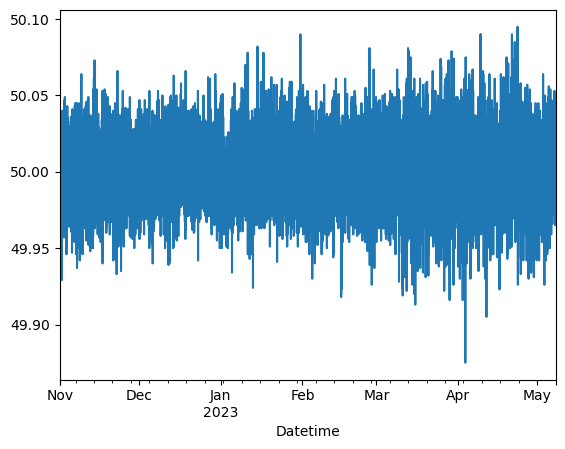

In [12]:
master_df['Actual frequency'].plot()

In [13]:
master_df['Actual frequency'].mean()

50.00159321658168

<Axes: xlabel='Datetime'>

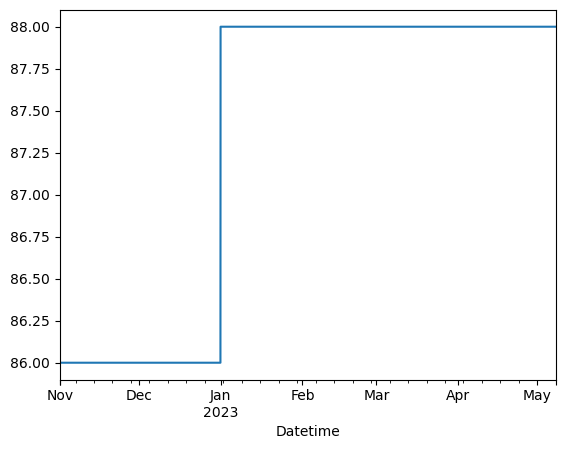

In [14]:
master_df['FCR Demand'].plot()

<Axes: xlabel='Datetime'>

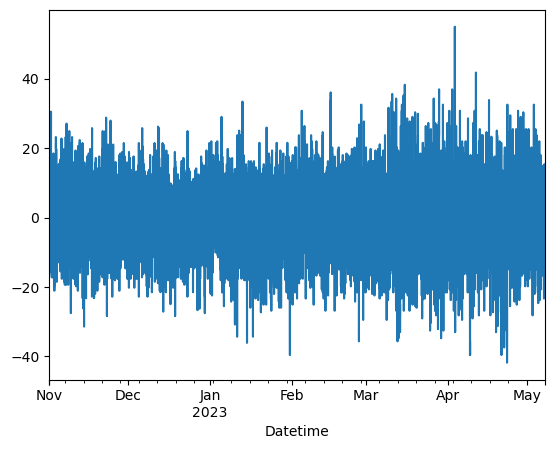

In [15]:
master_df['FCR Requested'].plot()

In [16]:
master_df = master_df.drop('FCR Demand', axis = 1)

In [17]:
master_df

,Actual frequency,FCR Requested
Datetime,,
2023-05-07 21:45:00,50.012,-5.28
2023-05-07 21:30:00,50.019,-8.36
2023-05-07 21:15:00,49.979,9.24
2023-05-07 21:00:00,49.999,0.44
2023-05-07 20:45:00,50.028,-12.32
...,...,...
2022-11-01 00:00:00,50.016,-6.88
2022-10-31 23:45:00,50.015,-6.45
2022-10-31 23:30:00,49.991,3.87


In [205]:
# Check master_df index data type   
master_df.index

DatetimeIndex(['2023-05-07 21:45:00', '2023-05-07 21:30:00',
               '2023-05-07 21:15:00', '2023-05-07 21:00:00',
               '2023-05-07 20:45:00', '2023-05-07 20:30:00',
               '2023-05-07 20:15:00', '2023-05-07 20:00:00',
               '2023-05-07 19:45:00', '2023-05-07 19:30:00',
               ...
               '2022-11-01 01:15:00', '2022-11-01 01:00:00',
               '2022-11-01 00:45:00', '2022-11-01 00:30:00',
               '2022-11-01 00:15:00', '2022-11-01 00:00:00',
               '2022-10-31 23:45:00', '2022-10-31 23:30:00',
               '2022-10-31 23:15:00', '2022-10-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18044, freq=None)

# Importing and Cleaning "Activated Balancing Energy Volumes per Minute"

In [151]:
balancing_energy_volumes_df = pd.read_csv('activated_balancing_energy_volumes_per_minute.csv', delimiter=';')

In [152]:
balancing_energy_volumes_df.tail()

,Datetime,Resolution code,Quarter hour,Quality status,Calculation time,System imbalance,Net regulation volume,SR,GUV,IGCC+,aFRR+,Bids+,mFRR Standard,mFRR Flex,Inter-TSO import,GDV,IGCC-,aFRR-,Bids-,Inter-TSO export
1936465,2019-09-01T00:04:00+02:00,PT1M,2019-09-01T00:00:00+02:00,Non-validated,2019-10-10T13:08:53+02:00,-263.132,197.696,NaN,197.696,145.0,52.696,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1936466,2019-09-01T00:03:00+02:00,PT1M,2019-09-01T00:00:00+02:00,Non-validated,2019-10-10T13:08:53+02:00,-245.507,187.971,NaN,187.971,145.0,42.971,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1936467,2019-09-01T00:02:00+02:00,PT1M,2019-09-01T00:00:00+02:00,Non-validated,2019-10-10T13:08:53+02:00,-224.004,178.201,NaN,178.201,145.0,33.201,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1936468,2019-09-01T00:01:00+02:00,PT1M,2019-09-01T00:00:00+02:00,Non-validated,2019-10-10T13:08:53+02:00,-220.086,168.375,NaN,168.375,145.0,23.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1936469,2019-09-01T00:00:00+02:00,PT1M,2019-09-01T00:00:00+02:00,Non-validated,2019-10-10T13:08:53+02:00,-206.520,158.384,NaN,158.384,145.0,13.384,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [153]:
balancing_energy_volumes_df['Datetime'] = balancing_energy_volumes_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))


In [154]:
balancing_energy_volumes_df['Datetime'] = pd.to_datetime(balancing_energy_volumes_df['Datetime']).dt.tz_convert(None)


In [155]:
balancing_energy_volumes_df = balancing_energy_volumes_df.set_index('Datetime')
balancing_energy_volumes_df.head()

,Resolution code,Quarter hour,Quality status,Calculation time,System imbalance,Net regulation volume,SR,GUV,IGCC+,aFRR+,Bids+,mFRR Standard,mFRR Flex,Inter-TSO import,GDV,IGCC-,aFRR-,Bids-,Inter-TSO export
Datetime,,,,,,,,,,,,,,,,,,,
2023-05-08 21:59:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,-64.596,69.781,NaN,73.517,0.0,73.517,NaN,NaN,NaN,NaN,3.736,0.0,3.736,NaN,NaN
2023-05-08 21:58:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,-72.546,75.471,NaN,77.980,0.0,77.980,NaN,NaN,NaN,NaN,2.509,0.0,2.509,NaN,NaN
2023-05-08 21:57:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,-82.322,80.433,NaN,82.061,0.0,82.061,NaN,NaN,NaN,NaN,1.628,0.0,1.628,NaN,NaN
2023-05-08 21:56:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,-88.686,84.569,NaN,85.482,0.0,85.482,NaN,NaN,NaN,NaN,0.913,0.0,0.913,NaN,NaN
2023-05-08 21:55:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,-93.141,87.688,NaN,88.058,0.0,88.058,NaN,NaN,NaN,NaN,0.371,0.0,0.371,NaN,NaN


In [156]:
balancing_energy_volumes_df = balancing_energy_volumes_df.drop(columns = ['Resolution code', 'Quarter hour' , 'Quality status', 'Calculation time', 'SR','Bids+', 'mFRR Standard', 'mFRR Flex', 'Inter-TSO import', 'Bids-', 'Inter-TSO export'])

In [157]:
balancing_energy_volumes_df = balancing_energy_volumes_df[balancing_energy_volumes_df.index.isin(date_range)]


In [158]:
balancing_energy_volumes_df

,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,aFRR-
Datetime,,,,,,,,
2023-05-07 21:45:00,-152.097,140.360,140.360,135.757,4.603,0.000,0.000,0.000
2023-05-07 21:30:00,61.252,-164.432,0.630,0.630,0.000,165.062,38.120,126.942
2023-05-07 21:15:00,-383.707,295.043,295.043,64.350,108.593,0.000,0.000,0.000
2023-05-07 21:00:00,151.160,-149.294,0.000,0.000,0.000,149.294,123.344,25.950
2023-05-07 20:45:00,8.050,-2.151,75.000,0.000,0.000,77.151,72.559,4.592
...,...,...,...,...,...,...,...,...
2022-11-01 00:00:00,160.017,-138.693,0.000,0.000,0.000,138.693,128.323,10.370
2022-10-31 23:45:00,309.890,-206.948,50.000,0.000,0.000,256.948,217.215,39.733
2022-10-31 23:30:00,-274.545,124.253,124.253,69.796,54.457,0.000,0.000,0.000


In [159]:
# Check what are the 7 missing rows in master_df compared to balancing_energy_volumes_df
master_df[~master_df.index.isin(balancing_energy_volumes_df.index)]


,Actual frequency,FCR Requested
Datetime,,
2023-04-25 04:15:00,50.000,0.00
2023-03-23 05:45:00,50.013,-5.72
2023-03-23 05:30:00,49.989,4.84
2023-03-23 05:15:00,49.995,2.20
2023-03-13 22:15:00,50.064,-28.16
2023-02-23 05:30:00,49.988,5.28
2023-02-23 05:15:00,49.978,9.68


In [202]:
# Check which type is the index of balancing_energy_volumes_df
balancing_energy_volumes_df.index.dtype

dtype('<M8[ns]')

In [201]:
# Convert the index of balancing_energy_volumes_df to datetime
balancing_energy_volumes_df.index = pd.to_datetime(balancing_energy_volumes_df.index)

In [199]:
# Impute the rows 2023-04-25 04:15:00, 2023-03-23 05:45:00, 2023-03-23 05:30:00, 2023-03-23 05:15:00, 2023-03-13 22:15:00, 2023-02-23 05:30:00, 2023-02-23 05:15:00 by making it the average of the previous and next row in balancing_energy_volumes_df
balancing_energy_volumes_df.loc['2023-04-25 04:15:00'] = (balancing_energy_volumes_df.loc['2023-04-25 04:00:00'] + balancing_energy_volumes_df.loc['2023-04-25 04:30:00'])/2
balancing_energy_volumes_df.loc['2023-03-23 05:45:00'] = (balancing_energy_volumes_df.loc['2023-03-23 05:00:00'] + balancing_energy_volumes_df.loc['2023-03-23 06:00:00'])/2
balancing_energy_volumes_df.loc['2023-03-23 05:30:00'] = (balancing_energy_volumes_df.loc['2023-03-23 05:00:00'] + balancing_energy_volumes_df.loc['2023-03-23 06:00:00'])/2
balancing_energy_volumes_df.loc['2023-03-23 05:15:00'] = (balancing_energy_volumes_df.loc['2023-03-23 05:00:00'] + balancing_energy_volumes_df.loc['2023-03-23 06:00:00'])/2
balancing_energy_volumes_df.loc['2023-03-13 22:15:00'] = (balancing_energy_volumes_df.loc['2023-03-13 22:00:00'] + balancing_energy_volumes_df.loc['2023-03-13 22:30:00'])/2
balancing_energy_volumes_df.loc['2023-02-23 05:30:00'] = (balancing_energy_volumes_df.loc['2023-02-23 05:00:00'] + balancing_energy_volumes_df.loc['2023-02-23 05:45:00'])/2
balancing_energy_volumes_df.loc['2023-02-23 05:15:00'] = (balancing_energy_volumes_df.loc['2023-02-23 05:00:00'] + balancing_energy_volumes_df.loc['2023-02-23 05:45:00'])/2



In [206]:
balancing_energy_volumes_df.index

DatetimeIndex(['2023-05-07 21:45:00', '2023-05-07 21:30:00',
               '2023-05-07 21:15:00', '2023-05-07 21:00:00',
               '2023-05-07 20:45:00', '2023-05-07 20:30:00',
               '2023-05-07 20:15:00', '2023-05-07 20:00:00',
               '2023-05-07 19:45:00', '2023-05-07 19:30:00',
               ...
               '2022-10-31 23:30:00', '2022-10-31 23:15:00',
               '2022-10-31 23:00:00', '2023-04-25 04:15:00',
               '2023-03-23 05:45:00', '2023-03-23 05:30:00',
               '2023-03-23 05:15:00', '2023-03-13 22:15:00',
               '2023-02-23 05:30:00', '2023-02-23 05:15:00'],
              dtype='datetime64[ns]', name='Datetime', length=18044, freq=None)

# Importing and Cleaning "Actual Installed Power Generation"

In [27]:
actual_installed_power_generation_df = pd.read_csv('actual_installed_power_generation.csv', delimiter=';')

In [28]:
actual_installed_power_generation_df

,Datetime,Resolution code,Fuel,Installed Power,Total installed power
0,2023-05-08T00:00:00+02:00,P1D,LF,181.6,15228.6
1,2023-05-08T00:00:00+02:00,P1D,WA,1394.8,15228.6
2,2023-05-08T00:00:00+02:00,P1D,WI,2733.1,15228.6
3,2023-05-08T00:00:00+02:00,P1D,Other,1093.5,15228.6
4,2023-05-08T00:00:00+02:00,P1D,NG,5896.6,15228.6
...,...,...,...,...,...
18975,2015-01-01T00:00:00+01:00,P1D,Other,994.8,14574.2
18976,2015-01-01T00:00:00+01:00,P1D,CP,470.0,14574.2
18977,2015-01-01T00:00:00+01:00,P1D,LF,294.2,14574.2
18978,2015-01-01T00:00:00+01:00,P1D,NG,4632.0,14574.2


**Approach:**
1. Delete all dates that appear before 31-10-2022
2. Convert Datetime column into datetime format
3. Convert fuel into separate fuel types
4. Populate the columns with Installed Power Values
5. Fill in the values for the whole day in 15-minute increments

In [29]:
actual_installed_power_generation_df['Datetime'] = actual_installed_power_generation_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))


In [30]:
actual_installed_power_generation_df['Datetime'] = pd.to_datetime(actual_installed_power_generation_df['Datetime']).dt.tz_convert(None)


In [31]:
actual_installed_power_generation_df = actual_installed_power_generation_df.set_index('Datetime')
actual_installed_power_generation_df.head()

,Resolution code,Fuel,Installed Power,Total installed power
Datetime,,,,
2023-05-07 22:00:00,P1D,LF,181.6,15228.6
2023-05-07 22:00:00,P1D,WA,1394.8,15228.6
2023-05-07 22:00:00,P1D,WI,2733.1,15228.6
2023-05-07 22:00:00,P1D,Other,1093.5,15228.6
2023-05-07 22:00:00,P1D,NG,5896.6,15228.6


In [32]:
actual_installed_power_generation_df.index = actual_installed_power_generation_df.index.strftime('%Y-%m-%d')
actual_installed_power_generation_df

,Resolution code,Fuel,Installed Power,Total installed power
Datetime,,,,
2023-05-07,P1D,LF,181.6,15228.6
2023-05-07,P1D,WA,1394.8,15228.6
2023-05-07,P1D,WI,2733.1,15228.6
2023-05-07,P1D,Other,1093.5,15228.6
2023-05-07,P1D,NG,5896.6,15228.6
...,...,...,...,...
2014-12-31,P1D,Other,994.8,14574.2
2014-12-31,P1D,CP,470.0,14574.2
2014-12-31,P1D,LF,294.2,14574.2


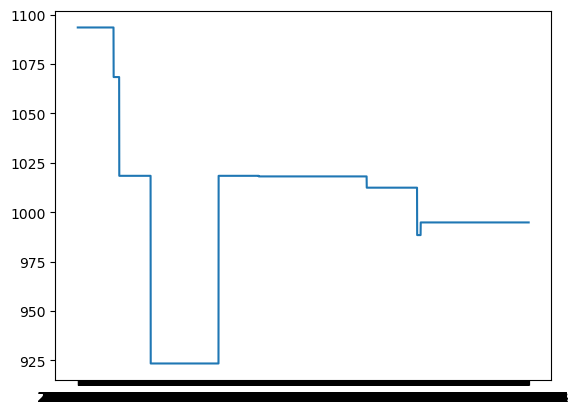

In [33]:
selected_values = actual_installed_power_generation_df[actual_installed_power_generation_df["Fuel"] == "Other"]["Installed Power"]
plt.plot(selected_values)


In [34]:
fuel_labels = actual_installed_power_generation_df['Fuel'].unique()
fuel_labels

array(['LF', 'WA', 'WI', 'Other', 'NG', 'NU', 'CP'], dtype=object)

**After checking the distribution of values per fuel type in the past X amount of years, it looks like including these variables will just introduce constants into the model. Therefore, I decided to drop them.**

# Importing and Cleaning "Current System Imbalance"


In [35]:
current_system_imbalance_df = pd.read_csv('current_system_imbalance.csv', delimiter=';')

In [36]:
current_system_imbalance_df

,Datetime,Resolution code,System imbalance,Net regulation volume,SR,GUV,aFRR+,aFRR-,IGCC+,IGCC-,Bids+,Bids-,mFRR Standard,mFRR Flex,ICH+,Inter-TSO import,Inter-TSO export,GDV
0,2023-04-24T12:37:00+02:00,PT1M,-106.301,112.587,NaN,200.000,0.000,12.458,0.000,74.955,195.0,0.0,5.0,0.0,NaN,NaN,NaN,87.413
1,2023-04-24T12:36:00+02:00,PT1M,-144.379,167.097,NaN,200.000,0.000,6.889,0.000,26.014,195.0,0.0,5.0,0.0,NaN,NaN,NaN,32.903
2,2023-04-24T12:34:00+02:00,PT1M,-221.246,243.134,NaN,246.121,15.116,2.987,31.005,0.000,195.0,0.0,5.0,0.0,NaN,NaN,NaN,2.987
3,2023-04-24T12:33:00+02:00,PT1M,-286.601,267.367,NaN,271.522,12.531,4.155,58.991,0.000,195.0,0.0,5.0,0.0,NaN,NaN,NaN,4.155
4,2023-04-24T12:29:00+02:00,PT1M,-298.142,314.600,NaN,318.281,1.198,3.681,167.083,0.000,145.0,0.0,5.0,0.0,NaN,NaN,NaN,3.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883202,2019-01-01T00:13:00+01:00,PT1M,-145.084,100.533,NaN,150.533,145.000,0.000,5.533,0.000,0.0,50.0,0.0,0.0,NaN,NaN,NaN,50.000
883203,2019-01-01T00:11:00+01:00,PT1M,-199.671,69.528,NaN,119.528,118.545,0.000,0.983,0.000,0.0,50.0,0.0,0.0,NaN,NaN,NaN,50.000
883204,2019-01-01T00:07:00+01:00,PT1M,-127.707,-8.830,NaN,41.170,41.170,0.000,0.000,0.000,0.0,50.0,0.0,0.0,NaN,NaN,NaN,50.000
883205,2019-01-01T00:03:00+01:00,PT1M,-160.694,-74.277,NaN,12.000,0.000,36.277,12.000,0.000,0.0,50.0,0.0,0.0,NaN,NaN,NaN,86.277


In [37]:
current_system_imbalance_df['Datetime'] = current_system_imbalance_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
current_system_imbalance_df['Datetime'] = pd.to_datetime(current_system_imbalance_df['Datetime']).dt.tz_convert(None)
current_system_imbalance_df = current_system_imbalance_df.set_index('Datetime')
current_system_imbalance_df.head()

,Resolution code,System imbalance,Net regulation volume,SR,GUV,aFRR+,aFRR-,IGCC+,IGCC-,Bids+,Bids-,mFRR Standard,mFRR Flex,ICH+,Inter-TSO import,Inter-TSO export,GDV
Datetime,,,,,,,,,,,,,,,,,
2023-04-24 10:37:00,PT1M,-106.301,112.587,NaN,200.000,0.000,12.458,0.000,74.955,195.0,0.0,5.0,0.0,NaN,NaN,NaN,87.413
2023-04-24 10:36:00,PT1M,-144.379,167.097,NaN,200.000,0.000,6.889,0.000,26.014,195.0,0.0,5.0,0.0,NaN,NaN,NaN,32.903
2023-04-24 10:34:00,PT1M,-221.246,243.134,NaN,246.121,15.116,2.987,31.005,0.000,195.0,0.0,5.0,0.0,NaN,NaN,NaN,2.987
2023-04-24 10:33:00,PT1M,-286.601,267.367,NaN,271.522,12.531,4.155,58.991,0.000,195.0,0.0,5.0,0.0,NaN,NaN,NaN,4.155
2023-04-24 10:29:00,PT1M,-298.142,314.600,NaN,318.281,1.198,3.681,167.083,0.000,145.0,0.0,5.0,0.0,NaN,NaN,NaN,3.681


In [38]:
current_system_imbalance_df = current_system_imbalance_df[current_system_imbalance_df.index.isin(date_range)]
current_system_imbalance_df

,Resolution code,System imbalance,Net regulation volume,SR,GUV,aFRR+,aFRR-,IGCC+,IGCC-,Bids+,Bids-,mFRR Standard,mFRR Flex,ICH+,Inter-TSO import,Inter-TSO export,GDV
Datetime,,,,,,,,,,,,,,,,,
2023-04-24 09:30:00,PT1M,-516.771,517.460,NaN,517.462,2.693,0.002,214.769,0.000,295.0,0.0,5.0,0.0,NaN,NaN,NaN,0.002
2023-04-24 08:15:00,PT1M,-572.483,557.929,NaN,557.929,96.000,0.000,61.929,0.000,395.0,0.0,5.0,0.0,NaN,NaN,NaN,0.000
2023-04-24 07:45:00,PT1M,-87.063,105.707,NaN,106.271,8.146,0.564,98.125,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.564
2023-04-24 07:30:00,PT1M,-30.304,24.255,NaN,33.345,7.412,0.000,25.933,9.090,0.0,0.0,0.0,0.0,NaN,NaN,NaN,9.090
2023-04-24 07:00:00,PT1M,677.997,-386.208,NaN,0.000,0.000,134.920,0.000,251.288,0.0,0.0,0.0,0.0,NaN,NaN,NaN,386.208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01 05:30:00,PT1M,64.119,-49.681,NaN,1.459,0.000,25.514,1.459,25.626,0.0,0.0,0.0,0.0,NaN,NaN,NaN,51.140
2022-11-01 05:15:00,PT1M,189.800,-247.151,NaN,0.000,0.000,87.606,0.000,159.545,0.0,0.0,0.0,0.0,NaN,NaN,NaN,247.151
2022-11-01 04:30:00,PT1M,-214.957,141.239,NaN,141.239,67.524,0.000,73.715,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000


**Garbage, do not use**

# Importing and Cleaning - Forecast Available Capacity by Contracted Unit

In [39]:
forecast_acbcu_df = pd.read_csv('forecast_available_capacity_by_contracted_units.csv', delimiter=';')

In [40]:
forecast_acbcu_df

,Datetime,Resolution code,Unit,ScheduledValue
0,2023-12-31T00:00:00+01:00,P1D,Belwind Phase 1,165.0
1,2023-12-31T00:00:00+01:00,P1D,Norther Offshore WP,370.0
2,2023-12-31T00:00:00+01:00,P1D,Nobelwind Offshore Windpark,165.0
3,2023-12-31T00:00:00+01:00,P1D,VILVOORDE GT,262.4
4,2023-12-31T00:00:00+01:00,P1D,Zelzate 2 Knippegroen,306.9
...,...,...,...,...
134762,2015-01-01T00:00:00+01:00,P1D,RODENHUIZE 4,205.0
134763,2015-01-01T00:00:00+01:00,P1D,LANGERLO 2,NaN
134764,2015-01-01T00:00:00+01:00,P1D,DOEL 2,433.2
134765,2015-01-01T00:00:00+01:00,P1D,DROGENBOS ST,170.4


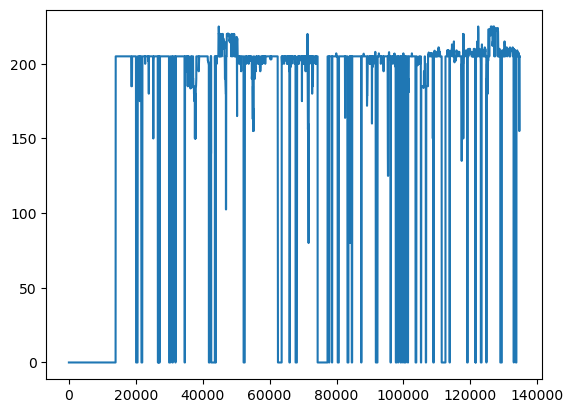

In [41]:
available_units = forecast_acbcu_df[forecast_acbcu_df["Unit"] == "RODENHUIZE 4"]["ScheduledValue"]
plt.plot(available_units)

In [42]:
unit_labels = forecast_acbcu_df['Unit'].unique()
unit_labels

array(['Belwind Phase 1', 'Norther Offshore WP',
       'Nobelwind Offshore Windpark', 'VILVOORDE GT',
       'Zelzate 2 Knippegroen', 'Marcinelle Energie (Carsid)', 'COO 5 T',
       'RODENHUIZE 4', 'RINGVAART STEG', 'DROGENBOS GT2', 'DOEL 3',
       'DOEL 4', 'DROGENBOS GT1', 'DOEL 2', 'T-power Beringen', 'COO 6 T',
       'Rentel Offshore WP', 'COO 2 T', 'COO 3 T', 'COO 1 T',
       'Amercoeur 1 R GT', 'Northwind', 'Seastar Offshore WP',
       'HERDERSBRUG ST', 'TIHANGE 2', 'SAINT-GHISLAIN STEG', 'SERAING TV',
       'DROGENBOS ST', 'VILVOORDE ST', 'Mermaid Offshore WP',
       'Zandvliet Power', 'Scheldelaan Exxonmobil',
       'Thorntonbank - C-Power - Area NE',
       'Thorntonbank - C-Power - Area SW', 'Northwester 2', 'COO 4 T',
       'Amercoeur 1 R ST', 'DOEL 1', 'TIHANGE 3', 'TIHANGE 1S',
       'TIHANGE 1N', 'EDF Luminus Seraing GT2', 'EDF Luminus Seraing GT1',
       'HERDERSBRUG GT2', 'HERDERSBRUG GT1', 'LANGERLO 1', 'LANGERLO 2',
       'EDF Luminus Seraing TGV'], dtype

Constants - Nobelwind Offshore Windpark, VILVOORDE GT, Marcinelle Energie (Carsid), COO 5 T

In [43]:
# Create a new column that contains the sum of ScheduledValue for all units for each time step
forecast_acbcu_df['Total'] = forecast_acbcu_df.groupby('Datetime')['ScheduledValue'].transform('sum')
forecast_acbcu_df


,Datetime,Resolution code,Unit,ScheduledValue,Total
0,2023-12-31T00:00:00+01:00,P1D,Belwind Phase 1,165.0,10690.8
1,2023-12-31T00:00:00+01:00,P1D,Norther Offshore WP,370.0,10690.8
2,2023-12-31T00:00:00+01:00,P1D,Nobelwind Offshore Windpark,165.0,10690.8
3,2023-12-31T00:00:00+01:00,P1D,VILVOORDE GT,262.4,10690.8
4,2023-12-31T00:00:00+01:00,P1D,Zelzate 2 Knippegroen,306.9,10690.8
...,...,...,...,...,...
134762,2015-01-01T00:00:00+01:00,P1D,RODENHUIZE 4,205.0,8438.7
134763,2015-01-01T00:00:00+01:00,P1D,LANGERLO 2,NaN,8438.7
134764,2015-01-01T00:00:00+01:00,P1D,DOEL 2,433.2,8438.7
134765,2015-01-01T00:00:00+01:00,P1D,DROGENBOS ST,170.4,8438.7


<Axes: xlabel='Datetime'>

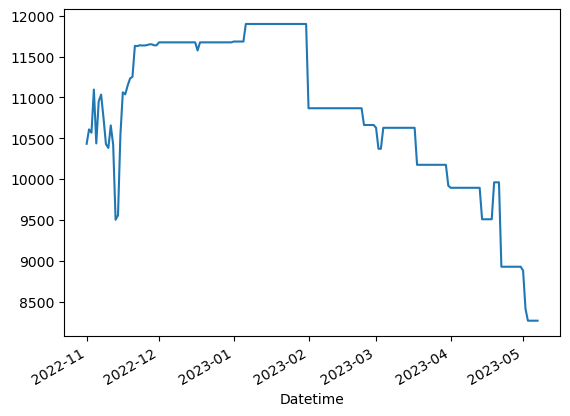

In [44]:
# Create a line chart showing the total available capacity for each time step between 31-10-2022 and 07-05-2023
forecast_acbcu_df['Datetime'] = forecast_acbcu_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
forecast_acbcu_df['Datetime'] = pd.to_datetime(forecast_acbcu_df['Datetime']).dt.tz_convert(None)
forecast_acbcu_df = forecast_acbcu_df.set_index('Datetime')
forecast_acbcu_df = forecast_acbcu_df[forecast_acbcu_df.index.isin(date_range)]
forecast_acbcu_df['Total'].plot()
    

In [45]:
# Convert the index to a datetime object and remove the timezone information in forecast_acbcu_df
forecast_acbcu_df.index = forecast_acbcu_df.index.strftime('%Y-%m-%d')
forecast_acbcu_df

,Resolution code,Unit,ScheduledValue,Total
Datetime,,,,
2023-05-06,P1D,Belwind Phase 1,165.0,8266.7
2023-05-06,P1D,Seastar Offshore WP,NaN,8266.7
2023-05-06,P1D,Rentel Offshore WP,NaN,8266.7
2023-05-06,P1D,Nobelwind Offshore Windpark,165.0,8266.7
2023-05-06,P1D,Thorntonbank - C-Power - Area NE,149.0,8266.7
...,...,...,...,...
2022-10-31,P1D,TIHANGE 3,1010.6,10431.7
2022-10-31,P1D,TIHANGE 2,984.1,10431.7
2022-10-31,P1D,VILVOORDE ST,NaN,10431.7


In [46]:
# Remove the Resolution code, unit, and scheduledValue columns from forecast_acbcu_df
forecast_acbcu_df = forecast_acbcu_df.drop(columns = ['Resolution code', 'Unit', 'ScheduledValue'])
forecast_acbcu_df

,Total
Datetime,
2023-05-06,8266.7
2023-05-06,8266.7
2023-05-06,8266.7
2023-05-06,8266.7
2023-05-06,8266.7
...,...
2022-10-31,10431.7
2022-10-31,10431.7
2022-10-31,10431.7


In [47]:
# Remove duplicate datetimes from forecast_acbcu_df
forecast_acbcu_df = forecast_acbcu_df[~forecast_acbcu_df.index.duplicated(keep='first')]
forecast_acbcu_df

,Total
Datetime,
2023-05-06,8266.7
2023-05-05,8266.7
2023-05-04,8266.7
2023-05-03,8266.7
2023-05-02,8266.7
...,...
2022-11-04,10436.3
2022-11-03,11095.8
2022-11-02,10567.4


In [48]:
# Impute the values stored in days in the forecast_acbcu_df to the same datetime format in master_df
forecast_acbcu_df.index = pd.to_datetime(forecast_acbcu_df.index)
forecast_acbcu_df.index = forecast_acbcu_df.index.strftime('%Y-%m-%d %H:%M:%S')
forecast_acbcu_df

,Total
Datetime,
2023-05-06 00:00:00,8266.7
2023-05-05 00:00:00,8266.7
2023-05-04 00:00:00,8266.7
2023-05-03 00:00:00,8266.7
2023-05-02 00:00:00,8266.7
...,...
2022-11-04 00:00:00,10436.3
2022-11-03 00:00:00,11095.8
2022-11-02 00:00:00,10567.4


In [49]:
# Spread the hours in 15 minute intervals in forecast_acbcu_df
forecast_acbcu_df.index = pd.to_datetime(forecast_acbcu_df.index)
forecast_acbcu_df = forecast_acbcu_df.resample('15min').ffill()
forecast_acbcu_df

,Total
Datetime,
2022-10-31 00:00:00,10431.7
2022-10-31 00:15:00,10431.7
2022-10-31 00:30:00,10431.7
2022-10-31 00:45:00,10431.7
2022-10-31 01:00:00,10431.7
...,...
2023-05-05 23:00:00,8266.7
2023-05-05 23:15:00,8266.7
2023-05-05 23:30:00,8266.7


Missing values for 06-05-2023 and 07-05-2023. Re-downloaded the missing data from the Elia website, repeating the process

In [50]:
# Import ods038.csv as a dataframe
ods038_df = pd.read_csv('ods038.csv', delimiter=';')
ods038_df

,Datetime,Resolution code,Unit,ScheduledValue
0,2023-05-08T00:00:00+02:00,P1D,Nobelwind Offshore Windpark,165.0
1,2023-05-08T00:00:00+02:00,P1D,Northwester 2,NaN
2,2023-05-08T00:00:00+02:00,P1D,Seastar Offshore WP,NaN
3,2023-05-08T00:00:00+02:00,P1D,Northwind,216.0
4,2023-05-08T00:00:00+02:00,P1D,Scheldelaan Exxonmobil,140.0
...,...,...,...,...
175,2023-05-05T00:00:00+02:00,P1D,Marcinelle Energie (Carsid),380.0
176,2023-05-05T00:00:00+02:00,P1D,RODENHUIZE 4,0.0
177,2023-05-05T00:00:00+02:00,P1D,TIHANGE 2,0.0
178,2023-05-05T00:00:00+02:00,P1D,Zandvliet Power,380.2


In [51]:
# Convert the index to a datetime object and remove the timezone information in ods038_df
ods038_df['Datetime'] = ods038_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
ods038_df['Datetime'] = pd.to_datetime(ods038_df['Datetime']).dt.tz_convert(None)
ods038_df = ods038_df.set_index('Datetime')
ods038_df

,Resolution code,Unit,ScheduledValue
Datetime,,,
2023-05-07 22:00:00,P1D,Nobelwind Offshore Windpark,165.0
2023-05-07 22:00:00,P1D,Northwester 2,NaN
2023-05-07 22:00:00,P1D,Seastar Offshore WP,NaN
2023-05-07 22:00:00,P1D,Northwind,216.0
2023-05-07 22:00:00,P1D,Scheldelaan Exxonmobil,140.0
...,...,...,...
2023-05-04 22:00:00,P1D,Marcinelle Energie (Carsid),380.0
2023-05-04 22:00:00,P1D,RODENHUIZE 4,0.0
2023-05-04 22:00:00,P1D,TIHANGE 2,0.0


In [52]:
# Create a new column that contains the sum of ScheduledValue in ods_38 for all units for each time step
ods038_df['Total'] = ods038_df.groupby('Datetime')['ScheduledValue'].transform('sum')
ods038_df

,Resolution code,Unit,ScheduledValue,Total
Datetime,,,,
2023-05-07 22:00:00,P1D,Nobelwind Offshore Windpark,165.0,8266.7
2023-05-07 22:00:00,P1D,Northwester 2,NaN,8266.7
2023-05-07 22:00:00,P1D,Seastar Offshore WP,NaN,8266.7
2023-05-07 22:00:00,P1D,Northwind,216.0,8266.7
2023-05-07 22:00:00,P1D,Scheldelaan Exxonmobil,140.0,8266.7
...,...,...,...,...
2023-05-04 22:00:00,P1D,Marcinelle Energie (Carsid),380.0,8266.7
2023-05-04 22:00:00,P1D,RODENHUIZE 4,0.0,8266.7
2023-05-04 22:00:00,P1D,TIHANGE 2,0.0,8266.7


In [53]:
# Remove the Resolution code, unit, and scheduledValue columns from ods38_df
ods038_df = ods038_df.drop(columns = ['Resolution code', 'Unit', 'ScheduledValue'])
ods038_df

,Total
Datetime,
2023-05-07 22:00:00,8266.7
2023-05-07 22:00:00,8266.7
2023-05-07 22:00:00,8266.7
2023-05-07 22:00:00,8266.7
2023-05-07 22:00:00,8266.7
...,...
2023-05-04 22:00:00,8266.7
2023-05-04 22:00:00,8266.7
2023-05-04 22:00:00,8266.7


In [54]:
# Remove duplicate datetimes from ods38_df
ods038_df = ods038_df[~ods038_df.index.duplicated(keep='first')]
ods038_df


,Total
Datetime,
2023-05-07 22:00:00,8266.7
2023-05-06 22:00:00,8266.7
2023-05-05 22:00:00,8266.7
2023-05-04 22:00:00,8266.7


It's easier to just add the two values to the existing data frame manually since they are the same

In [55]:
# Create new rows from 2023-05-07 00:15:00 to 2023-05-07 21:45:00 in the forecast_acbcu_df dataframe that have the value 8266.7 in the Total column
# Define the start and end datetime values
start_datetime = '2023-05-06 00:00:00'
end_datetime = '2023-05-07 21:45:00'

new_rows = pd.DataFrame({'Total': 8266.7}, index=pd.date_range(start=start_datetime, end=end_datetime, freq='15min'))

# Append the new rows to the existing forecast_acbcu_df DataFrame
forecast_acbcu_df = forecast_acbcu_df.append(new_rows)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24832\2416545896.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_acbcu_df = forecast_acbcu_df.append(new_rows)


In [56]:
forecast_acbcu_df

,Total
2022-10-31 00:00:00,10431.7
2022-10-31 00:15:00,10431.7
2022-10-31 00:30:00,10431.7
2022-10-31 00:45:00,10431.7
2022-10-31 01:00:00,10431.7
...,...
2023-05-07 20:45:00,8266.7
2023-05-07 21:00:00,8266.7
2023-05-07 21:15:00,8266.7
2023-05-07 21:30:00,8266.7


<Axes: >

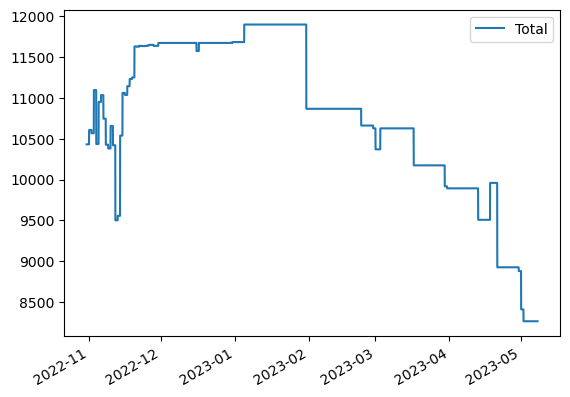

In [120]:
forecast_acbcu_df.plot()

In [207]:
# Check the time range of the forecast_acbcu_df
forecast_acbcu_df.index.min(), forecast_acbcu_df.index.max()

(Timestamp('2022-10-31 00:00:00'), Timestamp('2023-05-07 21:45:00'))

In [208]:
# Check for duplicate index entries in forecast_acbcu_df
forecast_acbcu_df.index.duplicated().any()


True

In [209]:
# Show duplicate index entries in forecast_acbcu_df
forecast_acbcu_df[forecast_acbcu_df.index.duplicated(keep=False)]


,Total
2023-05-06,8266.7
2023-05-06,8266.7


In [210]:
# Remove duplicate index entries in forecast_acbcu_df
forecast_acbcu_df = forecast_acbcu_df[~forecast_acbcu_df.index.duplicated(keep='first')]

In [211]:
forecast_acbcu_df

,Total
2022-10-31 00:00:00,10431.7
2022-10-31 00:15:00,10431.7
2022-10-31 00:30:00,10431.7
2022-10-31 00:45:00,10431.7
2022-10-31 01:00:00,10431.7
...,...
2023-05-07 20:45:00,8266.7
2023-05-07 21:00:00,8266.7
2023-05-07 21:15:00,8266.7
2023-05-07 21:30:00,8266.7


In [218]:
# Check what are the 7 missing rows in forecast_acbcu_df compared to master_df
forecast_acbcu_df[~forecast_acbcu_df.index.isin(master_df.index)]

,Total
2022-10-31 00:00:00,10431.7
2022-10-31 00:15:00,10431.7
2022-10-31 00:30:00,10431.7
2022-10-31 00:45:00,10431.7
2022-10-31 01:00:00,10431.7
...,...
2022-10-31 21:45:00,10431.7
2022-10-31 22:00:00,10431.7
2022-10-31 22:15:00,10431.7
2022-10-31 22:30:00,10431.7


In [219]:
# Remove the rows in forecast_acbcu_df that are not in master_df
forecast_acbcu_df = forecast_acbcu_df[forecast_acbcu_df.index.isin(master_df.index)]

forecast_acbcu_df

,Total
2022-10-31 23:00:00,10431.7
2022-10-31 23:15:00,10431.7
2022-10-31 23:30:00,10431.7
2022-10-31 23:45:00,10431.7
2022-11-01 00:00:00,10608.0
...,...
2023-05-07 20:45:00,8266.7
2023-05-07 21:00:00,8266.7
2023-05-07 21:15:00,8266.7
2023-05-07 21:30:00,8266.7


In [221]:
# Check if all the indexes are sequential in forecast_acbcu_df
forecast_acbcu_df.index.is_monotonic_increasing

True

# Importing and Cleaning - Imbalance Prices per Minute

In [57]:
# Import imbalance_prices_per_minute.csv as imbalance_prices_df
imbalance_prices_df = pd.read_csv('imbalance_prices_per_minute.csv', delimiter=';')

In [58]:
# Check first 5 rows of imbalance_prices_df
imbalance_prices_df.head()

,Datetime,Resolution code,Quarter hour,Quality status,Calculation time,Net regulation volume,System imbalance,Alpha,Marginal incremental price,Marginal decremental price,Strategic reserve price,System imbalance vs Incremental bids coordinable,Positive imbalance price,Negative imbalance price
0,2023-05-08T23:59:00+02:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,69.781,-64.596,0.0,207.09,32.80,NaN,NaN,207.09,207.09
1,2023-05-08T23:58:00+02:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,75.471,-72.546,0.0,207.63,42.91,NaN,NaN,207.63,207.63
2,2023-05-08T23:57:00+02:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,80.433,-82.322,0.0,208.53,43.60,NaN,NaN,208.53,208.53
3,2023-05-08T23:56:00+02:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,84.569,-88.686,0.0,209.51,43.60,NaN,NaN,209.51,209.51
4,2023-05-08T23:55:00+02:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,87.688,-93.141,0.0,210.60,43.60,NaN,NaN,210.60,210.60


In [59]:
# Convert Datetime column into a datetime object and remove the timezone information in imbalance_prices_df
imbalance_prices_df['Datetime'] = imbalance_prices_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
imbalance_prices_df['Datetime'] = pd.to_datetime(imbalance_prices_df['Datetime']).dt.tz_convert(None)
imbalance_prices_df = imbalance_prices_df.set_index('Datetime')
imbalance_prices_df.head()

,Resolution code,Quarter hour,Quality status,Calculation time,Net regulation volume,System imbalance,Alpha,Marginal incremental price,Marginal decremental price,Strategic reserve price,System imbalance vs Incremental bids coordinable,Positive imbalance price,Negative imbalance price
Datetime,,,,,,,,,,,,,
2023-05-08 21:59:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,69.781,-64.596,0.0,207.09,32.80,NaN,NaN,207.09,207.09
2023-05-08 21:58:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,75.471,-72.546,0.0,207.63,42.91,NaN,NaN,207.63,207.63
2023-05-08 21:57:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,80.433,-82.322,0.0,208.53,43.60,NaN,NaN,208.53,208.53
2023-05-08 21:56:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,84.569,-88.686,0.0,209.51,43.60,NaN,NaN,209.51,209.51
2023-05-08 21:55:00,PT1M,2023-05-08T23:45:00+02:00,Non-validated,2023-05-09T00:02:34+02:00,87.688,-93.141,0.0,210.60,43.60,NaN,NaN,210.60,210.60


In [60]:
# Remove the Resolution code, quarter hour, quality status, and calcualtion time columns from imbalance_prices_df
imbalance_prices_df = imbalance_prices_df.drop(columns = ['Resolution code', 'Quarter hour', 'Quality status', 'Calculation time'])
imbalance_prices_df.head()



,Net regulation volume,System imbalance,Alpha,Marginal incremental price,Marginal decremental price,Strategic reserve price,System imbalance vs Incremental bids coordinable,Positive imbalance price,Negative imbalance price
Datetime,,,,,,,,,
2023-05-08 21:59:00,69.781,-64.596,0.0,207.09,32.80,NaN,NaN,207.09,207.09
2023-05-08 21:58:00,75.471,-72.546,0.0,207.63,42.91,NaN,NaN,207.63,207.63
2023-05-08 21:57:00,80.433,-82.322,0.0,208.53,43.60,NaN,NaN,208.53,208.53
2023-05-08 21:56:00,84.569,-88.686,0.0,209.51,43.60,NaN,NaN,209.51,209.51
2023-05-08 21:55:00,87.688,-93.141,0.0,210.60,43.60,NaN,NaN,210.60,210.60


In [61]:
balancing_energy_volumes_df.head()

,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,aFRR-
Datetime,,,,,,,,
2023-05-07 21:45:00,-152.097,140.360,140.360,135.757,4.603,0.000,0.000,0.000
2023-05-07 21:30:00,61.252,-164.432,0.630,0.630,0.000,165.062,38.120,126.942
2023-05-07 21:15:00,-383.707,295.043,295.043,64.350,108.593,0.000,0.000,0.000
2023-05-07 21:00:00,151.160,-149.294,0.000,0.000,0.000,149.294,123.344,25.950
2023-05-07 20:45:00,8.050,-2.151,75.000,0.000,0.000,77.151,72.559,4.592


In [62]:
# Select only the row in imbalance_prices_df where datetime is equal to 2023-05-07 21:45:00
imbalance_prices_df.loc['2023-05-07 21:45:00']

Net regulation volume                               140.360
System imbalance                                   -152.097
Alpha                                                 0.790
Marginal incremental price                          141.500
Marginal decremental price                           50.700
Strategic reserve price                                 NaN
System imbalance vs Incremental bids coordinable        NaN
Positive imbalance price                            142.290
Negative imbalance price                            142.290
Name: 2023-05-07 21:45:00, dtype: float64

In [63]:
# Select the entries where Strategic reserve price is not equal to NaN in imbalance_prices_df
imbalance_prices_df[imbalance_prices_df['Strategic reserve price'].notna()]

,Net regulation volume,System imbalance,Alpha,Marginal incremental price,Marginal decremental price,Strategic reserve price,System imbalance vs Incremental bids coordinable,Positive imbalance price,Negative imbalance price
Datetime,,,,,,,,,


In [64]:
# Select the entries where System imbalance vs Incremental bids coordinable is not equal to NaN in imbalance_prices_df
imbalance_prices_df[imbalance_prices_df['System imbalance vs Incremental bids coordinable'].notna()]

,Net regulation volume,System imbalance,Alpha,Marginal incremental price,Marginal decremental price,Strategic reserve price,System imbalance vs Incremental bids coordinable,Positive imbalance price,Negative imbalance price
Datetime,,,,,,,,,


In [65]:
# Drop the System imbalance vs Incremental bids coordinable and Strategic reserve price columns from imbalance_prices_df
imbalance_prices_df = imbalance_prices_df.drop(columns = ['System imbalance vs Incremental bids coordinable', 'Strategic reserve price'])
imbalance_prices_df.head()

,Net regulation volume,System imbalance,Alpha,Marginal incremental price,Marginal decremental price,Positive imbalance price,Negative imbalance price
Datetime,,,,,,,
2023-05-08 21:59:00,69.781,-64.596,0.0,207.09,32.80,207.09,207.09
2023-05-08 21:58:00,75.471,-72.546,0.0,207.63,42.91,207.63,207.63
2023-05-08 21:57:00,80.433,-82.322,0.0,208.53,43.60,208.53,208.53
2023-05-08 21:56:00,84.569,-88.686,0.0,209.51,43.60,209.51,209.51
2023-05-08 21:55:00,87.688,-93.141,0.0,210.60,43.60,210.60,210.60


In [66]:
# Create 15 minute time steps between 31-10-2022 and 07-05-2023 and assign it to date_range in imbalance_prices_df
imbalance_prices_df = imbalance_prices_df[imbalance_prices_df.index.isin(date_range)]


In [67]:
imbalance_prices_df

,Net regulation volume,System imbalance,Alpha,Marginal incremental price,Marginal decremental price,Positive imbalance price,Negative imbalance price
Datetime,,,,,,,
2023-05-07 21:45:00,140.360,-152.097,0.79,141.50,50.70,142.29,142.29
2023-05-07 21:30:00,-164.432,61.252,0.00,141.50,-359.17,-359.17,-359.17
2023-05-07 21:15:00,295.043,-383.707,11.85,230.03,50.70,241.89,241.89
2023-05-07 21:00:00,-149.294,151.160,0.80,141.50,46.85,46.05,46.05
2023-05-07 20:45:00,-2.151,8.050,0.00,227.82,49.87,49.87,49.87
...,...,...,...,...,...,...,...
2022-11-01 00:00:00,-138.693,160.017,2.67,119.07,69.07,66.40,66.40
2022-10-31 23:45:00,-206.948,309.890,2.51,294.87,-0.39,-2.90,-2.90
2022-10-31 23:30:00,124.253,-274.545,2.22,119.65,69.07,121.87,121.87


In [68]:
# Remove Net regulation volume and system imbalance columns from imbalance_prices_df
imbalance_prices_df = imbalance_prices_df.drop(columns = ['Net regulation volume', 'System imbalance'])
imbalance_prices_df.head()

,Alpha,Marginal incremental price,Marginal decremental price,Positive imbalance price,Negative imbalance price
Datetime,,,,,
2023-05-07 21:45:00,0.79,141.50,50.70,142.29,142.29
2023-05-07 21:30:00,0.00,141.50,-359.17,-359.17,-359.17
2023-05-07 21:15:00,11.85,230.03,50.70,241.89,241.89
2023-05-07 21:00:00,0.80,141.50,46.85,46.05,46.05
2023-05-07 20:45:00,0.00,227.82,49.87,49.87,49.87


In [69]:
# Check for missing entries in the imbalance_prices_df
imbalance_prices_df.isna().sum()


Alpha                         0
Marginal incremental price    0
Marginal decremental price    0
Positive imbalance price      0
Negative imbalance price      0
dtype: int64

In [222]:
# Check what are the missing rows in master_df compared to imbalance_prices_df
master_df[~master_df.index.isin(imbalance_prices_df.index)]


,Actual frequency,FCR Requested
Datetime,,
2023-04-25 04:15:00,50.000,0.00
2023-03-23 05:45:00,50.013,-5.72
2023-03-23 05:30:00,49.989,4.84
2023-03-23 05:15:00,49.995,2.20
2023-03-13 22:15:00,50.064,-28.16
2023-02-23 05:30:00,49.988,5.28
2023-02-23 05:15:00,49.978,9.68


In [235]:
# Impute the rows in imbalance_prices_df 2023-04-25 04:15:00, 2023-03-23 05:45:00, 2023-03-23 05:30:00, 2023-03-23 05:15:00, 2023-03-13 22:15:00, 2023-02-23 05:30:00, 2023-02-23 05:15:00 by making it the average of the previous and next row in balancing_energy_volumes_df
imbalance_prices_df.loc['2023-04-25 04:15:00'] = (imbalance_prices_df.loc['2023-04-25 04:00:00'] + imbalance_prices_df.loc['2023-04-25 04:30:00'])/2
imbalance_prices_df.loc['2023-03-23 05:45:00'] = (imbalance_prices_df.loc['2023-03-23 05:00:00'] + imbalance_prices_df.loc['2023-03-23 06:00:00'])/2
imbalance_prices_df.loc['2023-03-23 05:30:00'] = (imbalance_prices_df.loc['2023-03-23 05:00:00'] + imbalance_prices_df.loc['2023-03-23 06:00:00'])/2
imbalance_prices_df.loc['2023-03-23 05:15:00'] = (imbalance_prices_df.loc['2023-03-23 05:00:00'] + imbalance_prices_df.loc['2023-03-23 06:00:00'])/2
imbalance_prices_df.loc['2023-03-13 22:15:00'] = (imbalance_prices_df.loc['2023-03-13 22:00:00'] + imbalance_prices_df.loc['2023-03-13 22:30:00'])/2
imbalance_prices_df.loc['2023-02-23 05:30:00'] = (imbalance_prices_df.loc['2023-02-23 05:00:00'] + imbalance_prices_df.loc['2023-02-23 05:45:00'])/2
imbalance_prices_df.loc['2023-02-23 05:15:00'] = (imbalance_prices_df.loc['2023-02-23 05:00:00'] + imbalance_prices_df.loc['2023-02-23 05:45:00'])/2

In [234]:
# Set the index in imbalance_prices_df to datetime
imbalance_prices_df.index = pd.to_datetime(imbalance_prices_df.index)


# Importing and cleaning individual_incremental_balancing_energy_bids.csv

In [70]:
# Import individual_incremental_balancing_energy_bids.csv as individual_incremental_balancing_energy_bids_df
individual_incremental_balancing_energy_bids_df = pd.read_csv('individual_incremental_balancing_energy_bids.csv', delimiter=';')
individual_incremental_balancing_energy_bids_df.head()


,Datetime,Resolution code,Activation Order,Reserve,Product,Bid Volume,Bid Price,Start Price,Bid+Start Price
0,2022-11-30T23:45:00+01:00,PT15M,2,mFRR,I C,0.8,681.27,106.38,787.65
1,2022-11-30T23:45:00+01:00,PT15M,2,mFRR,I C,49.8,299.77,0.00,299.77
2,2022-11-30T23:45:00+01:00,PT15M,1,aFRR,R2,7.0,445.60,NaN,445.60
3,2022-11-30T23:45:00+01:00,PT15M,2,mFRR,R3 Standard,6.0,3500.00,NaN,3500.00
4,2022-11-30T23:45:00+01:00,PT15M,2,mFRR,R3 Standard,74.6,2990.30,NaN,2990.30


In [71]:
# Show the info of individual_incremental_balancing_energy_bids_df
individual_incremental_balancing_energy_bids_df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418227 entries, 0 to 1418226
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Datetime          1418227 non-null  object 
 1   Resolution code   1418227 non-null  object 
 2   Activation Order  1418227 non-null  int64  
 3   Reserve           1418227 non-null  object 
 4   Product           1418227 non-null  object 
 5   Bid Volume        1418227 non-null  float64
 6   Bid Price         1418227 non-null  float64
 7   Start Price       1010584 non-null  float64
 8   Bid+Start Price   1418227 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 97.4+ MB


In [72]:
# Convert Datetime column into a datetime object and remove the timezone information in individual_incremental_balancing_energy_bids_df
individual_incremental_balancing_energy_bids_df['Datetime'] = individual_incremental_balancing_energy_bids_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
individual_incremental_balancing_energy_bids_df['Datetime'] = pd.to_datetime(individual_incremental_balancing_energy_bids_df['Datetime']).dt.tz_convert(None)
individual_incremental_balancing_energy_bids_df = individual_incremental_balancing_energy_bids_df.set_index('Datetime')
individual_incremental_balancing_energy_bids_df.head()

,Resolution code,Activation Order,Reserve,Product,Bid Volume,Bid Price,Start Price,Bid+Start Price
Datetime,,,,,,,,
2022-11-30 22:45:00,PT15M,2,mFRR,I C,0.8,681.27,106.38,787.65
2022-11-30 22:45:00,PT15M,2,mFRR,I C,49.8,299.77,0.00,299.77
2022-11-30 22:45:00,PT15M,1,aFRR,R2,7.0,445.60,NaN,445.60
2022-11-30 22:45:00,PT15M,2,mFRR,R3 Standard,6.0,3500.00,NaN,3500.00
2022-11-30 22:45:00,PT15M,2,mFRR,R3 Standard,74.6,2990.30,NaN,2990.30


In [73]:
individual_incremental_balancing_energy_bids_df.tail()

,Resolution code,Activation Order,Reserve,Product,Bid Volume,Bid Price,Start Price,Bid+Start Price
Datetime,,,,,,,,
2022-01-06 09:30:00,PT15M,2,mFRR,R3 Standard,41.0,329.00,152.94,481.94
2022-01-06 09:30:00,PT15M,2,mFRR,R3 Standard,17.0,527.23,115.61,642.84
2022-01-06 09:30:00,PT15M,2,mFRR,R3 Standard,17.0,526.55,112.36,638.91
2022-01-06 09:30:00,PT15M,2,mFRR,I C,0.6,528.33,63.29,591.62
2022-01-06 09:30:00,PT15M,2,mFRR,R3 Standard,17.0,526.55,116.96,643.51


In [74]:
# Set the index of individual_incremental_balancing_energy_bids_df to be in the interval between 31-10-2022 and 07-05-2023
individual_incremental_balancing_energy_bids_df = individual_incremental_balancing_energy_bids_df[individual_incremental_balancing_energy_bids_df.index.isin(date_range)]
individual_incremental_balancing_energy_bids_df


,Resolution code,Activation Order,Reserve,Product,Bid Volume,Bid Price,Start Price,Bid+Start Price
Datetime,,,,,,,,
2022-11-30 22:45:00,PT15M,2,mFRR,I C,0.8,681.27,106.38,787.65
2022-11-30 22:45:00,PT15M,2,mFRR,I C,49.8,299.77,0.00,299.77
2022-11-30 22:45:00,PT15M,1,aFRR,R2,7.0,445.60,NaN,445.60
2022-11-30 22:45:00,PT15M,2,mFRR,R3 Standard,6.0,3500.00,NaN,3500.00
2022-11-30 22:45:00,PT15M,2,mFRR,R3 Standard,74.6,2990.30,NaN,2990.30
...,...,...,...,...,...,...,...,...
2022-10-31 23:00:00,PT15M,2,mFRR,I C,0.2,679.38,131.58,810.96
2022-10-31 23:00:00,PT15M,2,mFRR,R3 Standard,1.0,950.00,NaN,950.00
2022-10-31 23:00:00,PT15M,2,mFRR,R3 Standard,16.0,679.38,121.95,801.33


Need to contact the transparency platform because the dates do not correspond with my frequency max variables

# Importing and Cleaning - Physical Flows on High Voltage Grid

In [75]:
# Import physical_flows_on_high_voltage_grid.csv as physical_flows_on_high_voltage_grid_df
physical_flows_on_high_voltage_grid_df = pd.read_csv('physical_flows_on_high_voltage_grid.csv', delimiter=';')
physical_flows_on_high_voltage_grid_df


,Datetime,Resolution code,Asset Elia ID,Asset name,Asset type,Base Voltage,AC/DC,Physical Flow,Loading,Asset geographic location,geo_point_2d
0,2023-04-19T01:30:00+02:00,PT15M,380_74_MERCA,HORTA-MERCATOR 380.74,Internal Line,380.0,AC,297.906685,10.30,"{""coordinates"": [[3.9, 51.162], [4.2468251, 51...","51.15802665, 4.07341255"
1,2023-04-19T01:30:00+02:00,PT15M,380_27,MAASBRACHT-VAN EYCK 380.27,Tieline,380.0,AC,1010.563087,63.97,"{""coordinates"": [[5.827389, 51.26019], [5.7739...","51.19074525, 5.8006569500000005"
2,2023-04-19T01:30:00+02:00,PT15M,380_21,MASSENHOVEN-MEERHOUT 380.21,Internal Line,380.0,AC,542.113658,33.64,"{""coordinates"": [[4.6292157, 51.1958298], [5.0...","51.151736650000004, 4.846361849999999"
3,2023-04-19T01:30:00+02:00,PT15M,380_52_MERCA,DOEL-MERCATOR 380.52,Internal Line,380.0,AC,419.843242,28.49,"{""coordinates"": [[4.29, 51.23], [4.25682509999...","51.18793805425691, 4.271088226331581"
4,2023-04-19T01:30:00+02:00,PT15M,380_65,LILLO-ZANDVLIET 380.65,Internal Line,380.0,AC,77.016835,3.50,"{""coordinates"": [[4.3072839, 51.3011478], [4.2...","51.335336350000006, 4.277696949999999"
...,...,...,...,...,...,...,...,...,...,...,...
2382213,2021-12-31T23:45:00+01:00,PT15M,380_91,LIXHE-VAN EYCK 380.91,Internal Line,380.0,AC,113.487270,7.33,"{""coordinates"": [[5.6691945, 50.7540781], [5.7...","50.9376893, 5.7215597"
2382214,2021-12-31T23:45:00+01:00,PT15M,380_33_BRUEG,BRUEGEL-COURCELLES 380.33,Internal Line,380.0,AC,91.343901,6.20,"{""coordinates"": [[4.2316923, 50.8810035], [4.2...","50.84226275, 4.2655886"
2382215,2021-12-31T23:45:00+01:00,PT15M,380_66,LILLO-ZANDVLIET 380.66,Internal Line,380.0,AC,348.399979,20.98,"{""coordinates"": [[4.3072839, 51.3011478], [4.3...","51.335336350000006, 4.286791371465029"
2382216,2021-12-31T23:45:00+01:00,PT15M,380_52_LILLO,DOEL-MERCATOR 380.52,Internal Line,380.0,AC,133.577876,6.25,"{""coordinates"": [[4.29, 51.23], [4.3172839, 51...","51.2655739, 4.303641949999999"


In [76]:
# Convert Datetime column into a datetime object and remove the timezone information in physical_flows_on_high_voltage_grid_df
physical_flows_on_high_voltage_grid_df['Datetime'] = physical_flows_on_high_voltage_grid_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
physical_flows_on_high_voltage_grid_df['Datetime'] = pd.to_datetime(physical_flows_on_high_voltage_grid_df['Datetime']).dt.tz_convert(None)
physical_flows_on_high_voltage_grid_df = physical_flows_on_high_voltage_grid_df.set_index('Datetime')
physical_flows_on_high_voltage_grid_df

,Resolution code,Asset Elia ID,Asset name,Asset type,Base Voltage,AC/DC,Physical Flow,Loading,Asset geographic location,geo_point_2d
Datetime,,,,,,,,,,
2023-04-18 23:30:00,PT15M,380_74_MERCA,HORTA-MERCATOR 380.74,Internal Line,380.0,AC,297.906685,10.30,"{""coordinates"": [[3.9, 51.162], [4.2468251, 51...","51.15802665, 4.07341255"
2023-04-18 23:30:00,PT15M,380_27,MAASBRACHT-VAN EYCK 380.27,Tieline,380.0,AC,1010.563087,63.97,"{""coordinates"": [[5.827389, 51.26019], [5.7739...","51.19074525, 5.8006569500000005"
2023-04-18 23:30:00,PT15M,380_21,MASSENHOVEN-MEERHOUT 380.21,Internal Line,380.0,AC,542.113658,33.64,"{""coordinates"": [[4.6292157, 51.1958298], [5.0...","51.151736650000004, 4.846361849999999"
2023-04-18 23:30:00,PT15M,380_52_MERCA,DOEL-MERCATOR 380.52,Internal Line,380.0,AC,419.843242,28.49,"{""coordinates"": [[4.29, 51.23], [4.25682509999...","51.18793805425691, 4.271088226331581"
2023-04-18 23:30:00,PT15M,380_65,LILLO-ZANDVLIET 380.65,Internal Line,380.0,AC,77.016835,3.50,"{""coordinates"": [[4.3072839, 51.3011478], [4.2...","51.335336350000006, 4.277696949999999"
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 22:45:00,PT15M,380_91,LIXHE-VAN EYCK 380.91,Internal Line,380.0,AC,113.487270,7.33,"{""coordinates"": [[5.6691945, 50.7540781], [5.7...","50.9376893, 5.7215597"
2021-12-31 22:45:00,PT15M,380_33_BRUEG,BRUEGEL-COURCELLES 380.33,Internal Line,380.0,AC,91.343901,6.20,"{""coordinates"": [[4.2316923, 50.8810035], [4.2...","50.84226275, 4.2655886"
2021-12-31 22:45:00,PT15M,380_66,LILLO-ZANDVLIET 380.66,Internal Line,380.0,AC,348.399979,20.98,"{""coordinates"": [[4.3072839, 51.3011478], [4.3...","51.335336350000006, 4.286791371465029"


In [77]:
# List the unique values in the Asset name column in physical_flows_on_high_voltage_grid_df¸
physical_flows_on_high_voltage_grid_df['Asset name'].unique()


array(['HORTA-MERCATOR 380.74', 'MAASBRACHT-VAN EYCK 380.27',
       'MASSENHOVEN-MEERHOUT 380.21', 'DOEL-MERCATOR 380.52',
       'LILLO-ZANDVLIET 380.65', 'BRUME-GRAMME 380.1',
       'MASSENHOVEN-MERCATOR 380.61', 'BRUEGEL-MERCATOR 380.35',
       'CHAMPION (NAMUR)-GRAMME 380.32', 'AVELGEM-HORTA 380.101',
       'GEZELLE-STEVIN 380.111', 'LIXHE-VAN EYCK 380.91',
       'ACHENE-LONNY 380.19', 'BRUEGEL-COURCELLES 380.33',
       'HORTA-VAN MAERLANT 380.103', 'DOEL-ZANDVLIET 380.26',
       'AUBANGE-BRUME 380.13', 'AVELGEM-HORTA 380.102',
       'ACHENE-GRAMME 380.10', 'LIXHE-ALEGRO 380.115',
       'RILLAND-ZANDVLIET 380.29', 'BRUME-GRAMME 380.2',
       'HORTA-MERCATOR 380.73', 'GRAMME-VAN EYCK 380.12',
       'MAASBRACHT-VAN EYCK 380.28', 'GEZELLE-VAN MAERLANT 380.108',
       'AVELIN-AVELGEM 380.80', 'BRUEGEL-MERCATOR 380.36',
       'GEZELLE-NEMO 380.114', 'COURCELLES-GRAMME 380.31',
       'DOEL-MERCATOR 380.51', 'AVELGEM-MASTAING 380.79',
       'HORTA-VAN MAERLANT 380.104', 'GE

Don't have all the entries in the correct time period. Maybe will need to re-check the ENTSO-E Transparency platform

# Importing and Cleaning - Planned Unavailability of Contracted Power Units

In [78]:
# Import planned_unavailabity_of_contracted_power_units.csv as planned_unavailabity_of_contracted_power_units_df
planned_unavailabity_of_contracted_power_units_df = pd.read_csv('planned_unavailabity_of_contracted_power_units.csv', delimiter=';')
planned_unavailabity_of_contracted_power_units_df

,Start,End,Time Series Start,Time Series End,Unit,Fuel classification,Pmax available,Pmax available after the outage,Reason,Last updated
0,2026-10-05T08:00:00+02:00,2026-10-15T18:00:00+02:00,2026-10-05T08:00:00+02:00,2026-10-15T18:00:00+02:00,COO 6 T,WA,230.0,0.0,Overhaul,2023-04-17T15:23:12+02:00
1,2026-09-05T00:00:00+02:00,2026-09-21T00:00:00+02:00,2026-09-05T00:00:00+02:00,2026-09-21T00:00:00+02:00,Zandvliet Power,NG,386.2,0.0,Overhaul,2023-05-03T16:49:27+02:00
2,2026-08-01T00:00:00+02:00,2026-08-15T23:59:00+02:00,2026-08-01T00:00:00+02:00,2026-08-15T23:59:00+02:00,Marcinelle Energie (Carsid),NG,413.0,0.0,Overhaul,2023-03-08T17:52:16+01:00
3,2026-06-22T08:00:00+02:00,2026-07-02T18:00:00+02:00,2026-06-22T08:00:00+02:00,2026-07-02T18:00:00+02:00,COO 5 T,WA,230.0,0.0,Overhaul,2023-04-17T15:23:08+02:00
4,2026-06-13T00:00:00+02:00,2026-06-20T00:00:00+02:00,2026-06-13T00:00:00+02:00,2026-06-20T00:00:00+02:00,HERDERSBRUG GT2,NG,156.3,0.0,Overhaul,2023-04-20T09:56:06+02:00
...,...,...,...,...,...,...,...,...,...,...
3808,2015-01-19T12:00:00+01:00,2015-01-19T13:00:00+01:00,2015-01-19T12:00:00+01:00,2015-01-19T13:00:00+01:00,Zelzate 2 Knippegroen,Other,315.0,200.0,repair of valve and sidmar limited gas production,2015-01-19T10:27:00+01:00
3809,2015-01-15T10:00:00+01:00,2015-01-15T12:00:00+01:00,2015-01-15T10:00:00+01:00,2015-01-15T12:00:00+01:00,Northwind,WI,216.0,80.0,Cut-off forecasted.iRES desk,2015-01-14T17:01:00+01:00
3810,2015-01-15T06:00:00+01:00,2015-01-15T10:00:00+01:00,2015-01-15T06:00:00+01:00,2015-01-15T10:00:00+01:00,Northwind,WI,216.0,20.0,Cut-off forecasted.iRES desk,2015-01-14T17:00:00+01:00
3811,2015-01-15T04:00:00+01:00,2015-01-15T06:00:00+01:00,2015-01-15T04:00:00+01:00,2015-01-15T06:00:00+01:00,Northwind,WI,216.0,80.0,Cut-off forecasted.iRES desk,2015-01-14T16:58:00+01:00


In [79]:
# Convert the Start, End, Time Series Start and Time Series End columns into a datetime object in planned_unavailabity_of_contracted_power_units_df
planned_unavailabity_of_contracted_power_units_df['Start'] = planned_unavailabity_of_contracted_power_units_df['Start'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
planned_unavailabity_of_contracted_power_units_df['End'] = planned_unavailabity_of_contracted_power_units_df['End'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
planned_unavailabity_of_contracted_power_units_df['Time Series Start'] = planned_unavailabity_of_contracted_power_units_df['Time Series Start'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
planned_unavailabity_of_contracted_power_units_df['Time Series End'] = planned_unavailabity_of_contracted_power_units_df['Time Series End'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
planned_unavailabity_of_contracted_power_units_df


,Start,End,Time Series Start,Time Series End,Unit,Fuel classification,Pmax available,Pmax available after the outage,Reason,Last updated
0,2026-10-05 08:00:00+02:00,2026-10-15 18:00:00+02:00,2026-10-05 08:00:00+02:00,2026-10-15 18:00:00+02:00,COO 6 T,WA,230.0,0.0,Overhaul,2023-04-17T15:23:12+02:00
1,2026-09-05 00:00:00+02:00,2026-09-21 00:00:00+02:00,2026-09-05 00:00:00+02:00,2026-09-21 00:00:00+02:00,Zandvliet Power,NG,386.2,0.0,Overhaul,2023-05-03T16:49:27+02:00
2,2026-08-01 00:00:00+02:00,2026-08-15 23:59:00+02:00,2026-08-01 00:00:00+02:00,2026-08-15 23:59:00+02:00,Marcinelle Energie (Carsid),NG,413.0,0.0,Overhaul,2023-03-08T17:52:16+01:00
3,2026-06-22 08:00:00+02:00,2026-07-02 18:00:00+02:00,2026-06-22 08:00:00+02:00,2026-07-02 18:00:00+02:00,COO 5 T,WA,230.0,0.0,Overhaul,2023-04-17T15:23:08+02:00
4,2026-06-13 00:00:00+02:00,2026-06-20 00:00:00+02:00,2026-06-13 00:00:00+02:00,2026-06-20 00:00:00+02:00,HERDERSBRUG GT2,NG,156.3,0.0,Overhaul,2023-04-20T09:56:06+02:00
...,...,...,...,...,...,...,...,...,...,...
3808,2015-01-19 12:00:00+01:00,2015-01-19 13:00:00+01:00,2015-01-19 12:00:00+01:00,2015-01-19 13:00:00+01:00,Zelzate 2 Knippegroen,Other,315.0,200.0,repair of valve and sidmar limited gas production,2015-01-19T10:27:00+01:00
3809,2015-01-15 10:00:00+01:00,2015-01-15 12:00:00+01:00,2015-01-15 10:00:00+01:00,2015-01-15 12:00:00+01:00,Northwind,WI,216.0,80.0,Cut-off forecasted.iRES desk,2015-01-14T17:01:00+01:00
3810,2015-01-15 06:00:00+01:00,2015-01-15 10:00:00+01:00,2015-01-15 06:00:00+01:00,2015-01-15 10:00:00+01:00,Northwind,WI,216.0,20.0,Cut-off forecasted.iRES desk,2015-01-14T17:00:00+01:00
3811,2015-01-15 04:00:00+01:00,2015-01-15 06:00:00+01:00,2015-01-15 04:00:00+01:00,2015-01-15 06:00:00+01:00,Northwind,WI,216.0,80.0,Cut-off forecasted.iRES desk,2015-01-14T16:58:00+01:00


In [80]:
# Remove the timezone information in planned_unavailabity_of_contracted_power_units_df in columns Start, End, Time Series Start and Time Series End
planned_unavailabity_of_contracted_power_units_df['Start'] = pd.to_datetime(planned_unavailabity_of_contracted_power_units_df['Start']).dt.tz_convert(None)
planned_unavailabity_of_contracted_power_units_df['End'] = pd.to_datetime(planned_unavailabity_of_contracted_power_units_df['End']).dt.tz_convert(None)
planned_unavailabity_of_contracted_power_units_df['Time Series Start'] = pd.to_datetime(planned_unavailabity_of_contracted_power_units_df['Time Series Start']).dt.tz_convert(None)
planned_unavailabity_of_contracted_power_units_df['Time Series End'] = pd.to_datetime(planned_unavailabity_of_contracted_power_units_df['Time Series End']).dt.tz_convert(None)
planned_unavailabity_of_contracted_power_units_df

,Start,End,Time Series Start,Time Series End,Unit,Fuel classification,Pmax available,Pmax available after the outage,Reason,Last updated
0,2026-10-05 06:00:00,2026-10-15 16:00:00,2026-10-05 06:00:00,2026-10-15 16:00:00,COO 6 T,WA,230.0,0.0,Overhaul,2023-04-17T15:23:12+02:00
1,2026-09-04 22:00:00,2026-09-20 22:00:00,2026-09-04 22:00:00,2026-09-20 22:00:00,Zandvliet Power,NG,386.2,0.0,Overhaul,2023-05-03T16:49:27+02:00
2,2026-07-31 22:00:00,2026-08-15 21:59:00,2026-07-31 22:00:00,2026-08-15 21:59:00,Marcinelle Energie (Carsid),NG,413.0,0.0,Overhaul,2023-03-08T17:52:16+01:00
3,2026-06-22 06:00:00,2026-07-02 16:00:00,2026-06-22 06:00:00,2026-07-02 16:00:00,COO 5 T,WA,230.0,0.0,Overhaul,2023-04-17T15:23:08+02:00
4,2026-06-12 22:00:00,2026-06-19 22:00:00,2026-06-12 22:00:00,2026-06-19 22:00:00,HERDERSBRUG GT2,NG,156.3,0.0,Overhaul,2023-04-20T09:56:06+02:00
...,...,...,...,...,...,...,...,...,...,...
3808,2015-01-19 11:00:00,2015-01-19 12:00:00,2015-01-19 11:00:00,2015-01-19 12:00:00,Zelzate 2 Knippegroen,Other,315.0,200.0,repair of valve and sidmar limited gas production,2015-01-19T10:27:00+01:00
3809,2015-01-15 09:00:00,2015-01-15 11:00:00,2015-01-15 09:00:00,2015-01-15 11:00:00,Northwind,WI,216.0,80.0,Cut-off forecasted.iRES desk,2015-01-14T17:01:00+01:00
3810,2015-01-15 05:00:00,2015-01-15 09:00:00,2015-01-15 05:00:00,2015-01-15 09:00:00,Northwind,WI,216.0,20.0,Cut-off forecasted.iRES desk,2015-01-14T17:00:00+01:00
3811,2015-01-15 03:00:00,2015-01-15 05:00:00,2015-01-15 03:00:00,2015-01-15 05:00:00,Northwind,WI,216.0,80.0,Cut-off forecasted.iRES desk,2015-01-14T16:58:00+01:00


In [81]:
# Show the entries that have a planned start and end in both 2022 and 2023 in planned_unavailabity_of_contracted_power_units_df
planned_unavailabity_of_contracted_power_units_df[(planned_unavailabity_of_contracted_power_units_df['Start'].dt.year == 2022) & (planned_unavailabity_of_contracted_power_units_df['End'].dt.year == 2022) & (planned_unavailabity_of_contracted_power_units_df['Time Series Start'].dt.year == 2022) & (planned_unavailabity_of_contracted_power_units_df['Time Series End'].dt.year == 2022)]



,Start,End,Time Series Start,Time Series End,Unit,Fuel classification,Pmax available,Pmax available after the outage,Reason,Last updated
533,2022-12-30 23:00:00,2022-12-31 01:00:00,2022-12-30 23:00:00,2022-12-31 01:00:00,DOEL 1,NU,445.0,355.0,Planned test,2022-12-29T10:16:37+01:00
536,2022-12-29 12:30:00,2022-12-29 14:11:00,2022-12-29 12:30:00,2022-12-29 14:11:00,COO 5 T,WA,230.0,0.0,Overhaul,2022-12-29T15:11:48+01:00
537,2022-12-28 23:00:00,2022-12-31 14:00:00,2022-12-28 23:00:00,2022-12-31 14:00:00,Lillo Degussa GT2,NG,32.0,0.0,Overhaul,2022-12-28T10:47:47+01:00
538,2022-12-28 06:00:00,2022-12-28 12:57:00,2022-12-28 06:00:00,2022-12-28 12:57:00,HERDERSBRUG ST,NG,167.0,0.0,Overhaul,2022-12-28T13:57:37+01:00
539,2022-12-28 06:00:00,2022-12-28 12:57:00,2022-12-28 06:00:00,2022-12-28 12:57:00,HERDERSBRUG GT1,NG,157.0,0.0,Overhaul,2022-12-28T13:57:33+01:00
...,...,...,...,...,...,...,...,...,...,...
1442,2022-01-10 06:00:00,2022-01-13 15:00:00,2022-01-10 06:00:00,2022-01-13 15:00:00,Zwijndrecht Lanxess GT,NG,43.0,0.0,Overhaul,2022-01-10T08:21:31+01:00
1443,2022-01-09 01:00:00,2022-01-09 03:00:00,2022-01-09 01:00:00,2022-01-09 03:00:00,RODENHUIZE 4,Other,268.0,80.1,Technical failure,2022-01-08T10:42:48+01:00
1444,2022-01-04 07:00:00,2022-01-04 15:00:00,2022-01-04 07:00:00,2022-01-04 15:00:00,EDF Luminus Seraing GT2,NG,150.0,0.0,NaN,2022-01-03T19:19:53+01:00
1445,2022-01-03 07:00:00,2022-01-03 11:00:00,2022-01-03 07:00:00,2022-01-03 11:00:00,SAINT-GHISLAIN STEG,NG,350.0,360.0,Test,2022-01-02T18:34:07+01:00


In [82]:
# Summarize the selected entries by fuel classification and show the sum of Pmax available in planned_unavailabity_of_contracted_power_units_df
planned_unavailabity_of_contracted_power_units_df[(planned_unavailabity_of_contracted_power_units_df['Start'].dt.year == 2022) & (planned_unavailabity_of_contracted_power_units_df['End'].dt.year == 2022) & (planned_unavailabity_of_contracted_power_units_df['Time Series Start'].dt.year == 2022) & (planned_unavailabity_of_contracted_power_units_df['Time Series End'].dt.year == 2022)].groupby('Fuel classification')['Pmax available'].sum()


Fuel classification
LF        1276.0
NG       72077.8
NU       31892.0
Other    10422.0
WA       24878.0
WI        6534.2
Name: Pmax available, dtype: float64

In [83]:
# Create a new column that contains the average 

# Importing and Cleaning PV_power_production_estimation_and_forecast_df

In [84]:
# Import pv_power_production_estimation_and_forecast.csv as pv_power_production_estimation_and_forecast_df
pv_power_production_estimation_and_forecast_df = pd.read_csv('pv_power_production_estimation_and_forecast.csv', delimiter=';')
pv_power_production_estimation_and_forecast_df

,Datetime,Resolution code,Region,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor
0,2023-05-08T23:45:00+02:00,PT15M,Flanders,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,5468.822,NaN
1,2023-05-08T23:45:00+02:00,PT15M,Flemish-Brabant,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,670.796,NaN
2,2023-05-08T23:45:00+02:00,PT15M,Wallonia,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,1796.196,NaN
3,2023-05-08T23:45:00+02:00,PT15M,Antwerp,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,1413.527,NaN
4,2023-05-08T23:45:00+02:00,PT15M,Luxembourg,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,165.228,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813956,2017-08-14T06:45:00+02:00,PT15M,Limburg,6.564,4.477,0.0,0.0,4.411,0.0,0.0,4.477,NaN,NaN,4.376,0.0,0.0,460.096,1.427
2813957,2017-08-14T06:45:00+02:00,PT15M,Luxembourg,1.147,0.836,0.0,0.0,0.826,0.0,0.0,0.836,NaN,NaN,0.817,0.0,0.0,85.961,1.334
2813958,2017-08-14T06:30:00+02:00,PT15M,Flanders,0.949,6.286,0.0,0.0,6.276,0.0,0.0,6.286,NaN,NaN,6.237,0.0,0.0,2168.186,0.044
2813959,2017-08-14T06:30:00+02:00,PT15M,Walloon-Brabant,0.000,0.214,0.0,0.0,0.214,0.0,0.0,0.214,NaN,NaN,0.213,0.0,0.0,72.311,0.000


In [85]:
# Convert the Datetime column into a datetime object in pv_power_production_estimation_and_forecast_df
pv_power_production_estimation_and_forecast_df['Datetime'] = pv_power_production_estimation_and_forecast_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
pv_power_production_estimation_and_forecast_df['Datetime'] = pd.to_datetime(pv_power_production_estimation_and_forecast_df['Datetime']).dt.tz_convert(None)
pv_power_production_estimation_and_forecast_df = pv_power_production_estimation_and_forecast_df.set_index('Datetime')
pv_power_production_estimation_and_forecast_df

,Resolution code,Region,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor
Datetime,,,,,,,,,,,,,,,,,
2023-05-08 21:45:00,PT15M,Flanders,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,5468.822,NaN
2023-05-08 21:45:00,PT15M,Flemish-Brabant,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,670.796,NaN
2023-05-08 21:45:00,PT15M,Wallonia,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,1796.196,NaN
2023-05-08 21:45:00,PT15M,Antwerp,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,1413.527,NaN
2023-05-08 21:45:00,PT15M,Luxembourg,NaN,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,165.228,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-14 04:45:00,PT15M,Limburg,6.564,4.477,0.0,0.0,4.411,0.0,0.0,4.477,NaN,NaN,4.376,0.0,0.0,460.096,1.427
2017-08-14 04:45:00,PT15M,Luxembourg,1.147,0.836,0.0,0.0,0.826,0.0,0.0,0.836,NaN,NaN,0.817,0.0,0.0,85.961,1.334
2017-08-14 04:30:00,PT15M,Flanders,0.949,6.286,0.0,0.0,6.276,0.0,0.0,6.286,NaN,NaN,6.237,0.0,0.0,2168.186,0.044


In [86]:
# Select only the entries that have been recorded is in the date range start_date = '2022-10-31 23:00:00' and end_date = '2023-05-07 21:59:50'
pv_power_production_estimation_and_forecast_df = pv_power_production_estimation_and_forecast_df.loc['2022-10-31 23:00:00':'2023-05-07 21:59:50']


In [87]:
pv_power_production_estimation_and_forecast_df

,Resolution code,Region,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor
Datetime,,,,,,,,,,,,,,,,,
2023-05-07 21:45:00,PT15M,Namur,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.941,NaN
2023-05-07 21:45:00,PT15M,Flemish-Brabant,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,670.796,NaN
2023-05-07 21:45:00,PT15M,Walloon-Brabant,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.315,NaN
2023-05-07 21:45:00,PT15M,West-Flanders,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1185.231,NaN
2023-05-07 21:45:00,PT15M,Limburg,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,765.814,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 23:00:00,PT15M,Walloon-Brabant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.512,0.0
2022-10-31 23:00:00,PT15M,West-Flanders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,972.944,0.0
2022-10-31 23:00:00,PT15M,Hainaut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.654,0.0


In [88]:
# Drop the Resolution code column in pv_power_production_estimation_and_forecast_df
pv_power_production_estimation_and_forecast_df = pv_power_production_estimation_and_forecast_df.drop(columns=['Resolution code'])
pv_power_production_estimation_and_forecast_df

,Region,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor
Datetime,,,,,,,,,,,,,,,,
2023-05-07 21:45:00,Namur,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.941,NaN
2023-05-07 21:45:00,Flemish-Brabant,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,670.796,NaN
2023-05-07 21:45:00,Walloon-Brabant,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.315,NaN
2023-05-07 21:45:00,West-Flanders,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1185.231,NaN
2023-05-07 21:45:00,Limburg,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,765.814,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 23:00:00,Walloon-Brabant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.512,0.0
2022-10-31 23:00:00,West-Flanders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,972.944,0.0
2022-10-31 23:00:00,Hainaut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.654,0.0


In [89]:
# Summarize all Regions into same 15 minute intervals and show the sum of all other columns in pv_power_production_estimation_and_forecast_df
pv_power_production_estimation_and_forecast_df = pv_power_production_estimation_and_forecast_df.resample('15T').sum()

# Show the first 5 entries in pv_power_production_estimation_and_forecast_df
pv_power_production_estimation_and_forecast_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_24832\3933499430.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pv_power_production_estimation_and_forecast_df = pv_power_production_estimation_and_forecast_df.resample('15T').sum()


,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor
Datetime,,,,,,,,,,,,,,,
2022-10-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18545.413,0.0
2022-10-31 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18545.413,0.0
2022-10-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18545.413,0.0
2022-10-31 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18545.413,0.0
2022-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18545.413,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-07 20:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22286.424,0.0
2023-05-07 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22286.424,0.0
2023-05-07 21:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22286.424,0.0


In [90]:
# Show number of non-null entries in each column in pv_power_production_estimation_and_forecast_df
pv_power_production_estimation_and_forecast_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18044 entries, 2022-10-31 23:00:00 to 2023-05-07 21:45:00
Freq: 15T
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Measured & Upscaled      18044 non-null  float64
 1   Most recent forecast     18044 non-null  float64
 2   Most recent P10          18044 non-null  float64
 3   Most recent P90          18044 non-null  float64
 4   Day Ahead 11AM forecast  18044 non-null  float64
 5   Day Ahead 11AM P10       18044 non-null  float64
 6   Day Ahead 11AM P90       18044 non-null  float64
 7   Day-ahead 6PM forecast   18044 non-null  float64
 8   Day-ahead 6PM P10        18044 non-null  float64
 9   Day-ahead 6PM P90        18044 non-null  float64
 10  Week-ahead forecast      18044 non-null  float64
 11  Week-ahead P10           18044 non-null  float64
 12  Week-ahead P90           18044 non-null  float64
 13  Monitored capacity       18044 

In [91]:
# Show the values that are not 0 in the Most recent forecast column in pv_power_production_estimation_and_forecast_df
pv_power_production_estimation_and_forecast_df[pv_power_production_estimation_and_forecast_df['Most recent forecast'] != 0]


,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor
Datetime,,,,,,,,,,,,,,,
2022-11-01 06:30:00,0.000,48.392,27.731,89.121,38.695,17.961,51.953,35.201,18.558,56.177,14.790,11.640,37.871,18545.413,0.000
2022-11-01 06:45:00,89.879,373.563,238.885,575.449,306.585,91.679,401.153,290.321,105.481,421.559,78.971,64.626,262.238,18545.413,6.916
2022-11-01 07:00:00,418.624,1045.616,714.266,1439.434,882.252,234.447,1171.758,852.898,275.452,1198.938,192.749,158.411,711.214,18545.413,32.041
2022-11-01 07:15:00,830.580,1848.125,1368.066,2405.270,1574.321,451.575,2063.108,1545.260,500.250,2113.816,333.358,271.710,1257.905,18545.413,66.002
2022-11-01 07:30:00,1343.035,2677.834,2099.781,3395.294,2276.418,716.929,2944.561,2250.774,755.914,3012.273,497.298,403.601,1815.428,18545.413,106.309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-07 18:00:00,727.438,600.779,288.619,1053.833,741.565,405.924,1189.821,667.945,267.346,1136.493,552.332,453.810,1020.537,22286.424,38.419
2023-05-07 18:15:00,512.630,397.292,188.392,697.941,491.861,266.189,802.077,447.758,179.644,758.444,380.914,340.142,680.065,22286.424,26.169
2023-05-07 18:30:00,303.807,232.174,108.712,400.403,288.986,155.484,460.456,263.913,105.760,435.040,230.727,217.489,443.336,22286.424,14.976


In [92]:
# Switch index order so newest entries are on the top in pv_power_production_estimation_and_forecast_df
pv_power_production_estimation_and_forecast_df = pv_power_production_estimation_and_forecast_df.sort_index(ascending=False)
pv_power_production_estimation_and_forecast_df

,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor
Datetime,,,,,,,,,,,,,,,
2023-05-07 21:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22286.424,0.0
2023-05-07 21:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22286.424,0.0
2023-05-07 21:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22286.424,0.0
2023-05-07 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22286.424,0.0
2023-05-07 20:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22286.424,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18545.413,0.0
2022-10-31 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18545.413,0.0
2022-10-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18545.413,0.0


In [93]:
# Plot all columns in pv_power_production_estimation_and_forecast_df in the last 30 days
# pv_power_production_estimation_and_forecast_df.loc['2023-05-06 21:59:50':'2023-05-07 21:59:50'].plot(subplots=True, figsize=(20, 20))


<Axes: xlabel='Datetime'>

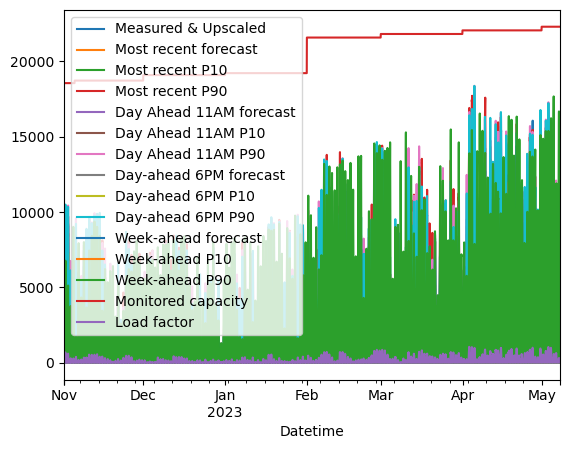

In [121]:
pv_power_production_estimation_and_forecast_df.plot()

# Importing and Cleaning "Total Load"

In [94]:
# Import total_load.csv as total_load_df
total_load_df = pd.read_csv('total_load.csv', delimiter=';')
total_load_df

,DateTime,Resolution code,Total Load
0,2023-05-09T23:45:00+02:00,PT15M,NaN
1,2023-05-09T23:30:00+02:00,PT15M,NaN
2,2023-05-09T23:15:00+02:00,PT15M,NaN
3,2023-05-09T23:00:00+02:00,PT15M,NaN
4,2023-05-09T22:45:00+02:00,PT15M,NaN
...,...,...,...
257847,2015-01-01T01:00:00+01:00,PT15M,9755.00
257848,2015-01-01T00:45:00+01:00,PT15M,9821.78
257849,2015-01-01T00:30:00+01:00,PT15M,9952.87
257850,2015-01-01T00:15:00+01:00,PT15M,10051.28


In [95]:
# Convert the Datetime column into a datetime object in total_load_df
total_load_df['DateTime'] = total_load_df['DateTime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
total_load_df['DateTime'] = pd.to_datetime(total_load_df['DateTime']).dt.tz_convert(None)
total_load_df = total_load_df.set_index('DateTime')
total_load_df

,Resolution code,Total Load
DateTime,,
2023-05-09 21:45:00,PT15M,NaN
2023-05-09 21:30:00,PT15M,NaN
2023-05-09 21:15:00,PT15M,NaN
2023-05-09 21:00:00,PT15M,NaN
2023-05-09 20:45:00,PT15M,NaN
...,...,...
2015-01-01 00:00:00,PT15M,9755.00
2014-12-31 23:45:00,PT15M,9821.78
2014-12-31 23:30:00,PT15M,9952.87


In [96]:
# Select only the entries that are between start_date = '2022-10-31 23:00:00' and end_date = '2023-05-07 21:59:50'
total_load_df = total_load_df.loc['2022-10-31 23:00:00':'2023-05-07 21:59:50']
total_load_df

,Resolution code,Total Load
DateTime,,
2023-05-07 21:45:00,PT15M,7994.16
2023-05-07 21:30:00,PT15M,7914.45
2023-05-07 21:15:00,PT15M,8096.30
2023-05-07 21:00:00,PT15M,8187.23
2023-05-07 20:45:00,PT15M,8201.35
...,...,...
2022-11-01 00:00:00,PT15M,7022.95
2022-10-31 23:45:00,PT15M,6987.90
2022-10-31 23:30:00,PT15M,7238.46


In [97]:
# Remove the Resolution code column
total_load_df = total_load_df.drop(columns=['Resolution code'])
total_load_df

,Total Load
DateTime,
2023-05-07 21:45:00,7994.16
2023-05-07 21:30:00,7914.45
2023-05-07 21:15:00,8096.30
2023-05-07 21:00:00,8187.23
2023-05-07 20:45:00,8201.35
...,...
2022-11-01 00:00:00,7022.95
2022-10-31 23:45:00,6987.90
2022-10-31 23:30:00,7238.46


In [98]:
# Plot the total load in the last 7 days
# total_load_df.loc['2023-05-01 21:59:50':'2023-05-07 21:59:50'].plot(subplots=True, figsize=(20, 20))


# Importing and Cleaning wind power production estimation

In [99]:
# Impoer wind_power_production_estimation.csv as wind_power_production_estimation_df
wind_power_production_estimation_df = pd.read_csv('wind_power_production_estimation.csv', delimiter=';')
wind_power_production_estimation_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_24832\2624993650.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_power_production_estimation_df = pd.read_csv('wind_power_production_estimation.csv', delimiter=';')


,Datetime,Resolution code,Offshore/onshore,Region,Grid connection type,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2023-05-15T23:45:00+02:00,PT15M,Onshore,Wallonia,Elia,NaN,10.40,3.10,33.30,NaN,...,NaN,NaN,NaN,NaN,10.40,3.10,33.30,158.60,NaN,NaN
1,2023-05-15T23:45:00+02:00,PT15M,Onshore,Wallonia,Dso,NaN,140.20,48.00,258.80,NaN,...,NaN,NaN,NaN,NaN,140.20,48.00,258.80,1071.88,NaN,NaN
2,2023-05-15T23:45:00+02:00,PT15M,Onshore,Flanders,Elia,NaN,39.90,18.20,65.80,NaN,...,NaN,NaN,NaN,NaN,39.90,18.20,65.80,373.25,NaN,NaN
3,2023-05-15T23:45:00+02:00,PT15M,Onshore,Flanders,Dso,NaN,133.10,56.80,200.60,NaN,...,NaN,NaN,NaN,NaN,133.10,56.80,200.60,1353.86,NaN,NaN
4,2023-05-15T23:45:00+02:00,PT15M,Offshore,Federal,Elia,NaN,1104.03,323.11,2166.88,NaN,...,NaN,NaN,NaN,NaN,1104.03,323.11,2166.88,2254.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446695,2015-01-01T00:00:00+01:00,PT15M,Onshore,Flanders,Elia,21.20,23.70,12.76,34.73,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,0.30,NaN
1446696,2015-01-01T00:00:00+01:00,PT15M,Onshore,Flanders,Dso,103.93,134.66,65.58,206.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.73,0.23,NaN
1446697,2015-01-01T00:00:00+01:00,PT15M,Onshore,Wallonia,Elia,5.17,13.07,5.84,22.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.00,0.05,NaN
1446698,2015-01-01T00:00:00+01:00,PT15M,Offshore,Federal,Elia,502.21,415.77,299.33,624.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.20,0.71,NaN


In [100]:
# Drop the Resolution code, Region, and Grid connection columns in wind_power_production_estimation_df
wind_power_production_estimation_df = wind_power_production_estimation_df.drop(columns=['Resolution code', 'Region', 'Grid connection type'])
wind_power_production_estimation_df

,Datetime,Offshore/onshore,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2023-05-15T23:45:00+02:00,Onshore,NaN,10.40,3.10,33.30,NaN,NaN,NaN,NaN,NaN,NaN,10.40,3.10,33.30,158.60,NaN,NaN
1,2023-05-15T23:45:00+02:00,Onshore,NaN,140.20,48.00,258.80,NaN,NaN,NaN,NaN,NaN,NaN,140.20,48.00,258.80,1071.88,NaN,NaN
2,2023-05-15T23:45:00+02:00,Onshore,NaN,39.90,18.20,65.80,NaN,NaN,NaN,NaN,NaN,NaN,39.90,18.20,65.80,373.25,NaN,NaN
3,2023-05-15T23:45:00+02:00,Onshore,NaN,133.10,56.80,200.60,NaN,NaN,NaN,NaN,NaN,NaN,133.10,56.80,200.60,1353.86,NaN,NaN
4,2023-05-15T23:45:00+02:00,Offshore,NaN,1104.03,323.11,2166.88,NaN,NaN,NaN,NaN,NaN,NaN,1104.03,323.11,2166.88,2254.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446695,2015-01-01T00:00:00+01:00,Onshore,21.20,23.70,12.76,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,0.30,NaN
1446696,2015-01-01T00:00:00+01:00,Onshore,103.93,134.66,65.58,206.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.73,0.23,NaN
1446697,2015-01-01T00:00:00+01:00,Onshore,5.17,13.07,5.84,22.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.00,0.05,NaN
1446698,2015-01-01T00:00:00+01:00,Offshore,502.21,415.77,299.33,624.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.20,0.71,NaN


In [101]:
# Convert the Datetime column into a datetime object in wind_power_production_estimation_df
wind_power_production_estimation_df['Datetime'] = wind_power_production_estimation_df['Datetime'].apply(parse).apply(lambda x: x.astimezone(timezone('CET')))
wind_power_production_estimation_df['Datetime'] = pd.to_datetime(wind_power_production_estimation_df['Datetime']).dt.tz_convert(None)
wind_power_production_estimation_df = wind_power_production_estimation_df.set_index('Datetime')
wind_power_production_estimation_df

,Offshore/onshore,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Datetime,,,,,,,,,,,,,,,,,
2023-05-15 21:45:00,Onshore,NaN,10.40,3.10,33.30,NaN,NaN,NaN,NaN,NaN,NaN,10.40,3.10,33.30,158.60,NaN,NaN
2023-05-15 21:45:00,Onshore,NaN,140.20,48.00,258.80,NaN,NaN,NaN,NaN,NaN,NaN,140.20,48.00,258.80,1071.88,NaN,NaN
2023-05-15 21:45:00,Onshore,NaN,39.90,18.20,65.80,NaN,NaN,NaN,NaN,NaN,NaN,39.90,18.20,65.80,373.25,NaN,NaN
2023-05-15 21:45:00,Onshore,NaN,133.10,56.80,200.60,NaN,NaN,NaN,NaN,NaN,NaN,133.10,56.80,200.60,1353.86,NaN,NaN
2023-05-15 21:45:00,Offshore,NaN,1104.03,323.11,2166.88,NaN,NaN,NaN,NaN,NaN,NaN,1104.03,323.11,2166.88,2254.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,Onshore,21.20,23.70,12.76,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,0.30,NaN
2014-12-31 23:00:00,Onshore,103.93,134.66,65.58,206.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.73,0.23,NaN
2014-12-31 23:00:00,Onshore,5.17,13.07,5.84,22.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.00,0.05,NaN


In [102]:
# Select only the entries that are between start_date = '2022-10-31 23:00:00' and end_date = '2023-05-07 21:59:50'
wind_power_production_estimation_df = wind_power_production_estimation_df.loc['2022-10-31 23:00:00':'2023-05-07 21:59:50']
wind_power_production_estimation_df


,Offshore/onshore,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Datetime,,,,,,,,,,,,,,,,,
2023-05-07 21:45:00,Onshore,0.47,5.00,2.40,20.90,4.90,0.80,24.70,5.00,0.60,19.20,52.80,26.00,87.60,373.25,0.00,NaN
2023-05-07 21:45:00,Onshore,16.94,15.00,0.60,57.20,25.50,7.20,81.30,23.30,2.90,55.00,245.10,147.60,360.80,1071.88,0.02,NaN
2023-05-07 21:45:00,Onshore,0.21,0.70,0.00,2.70,1.70,0.10,8.50,1.60,0.00,4.90,25.40,7.20,43.50,158.60,0.00,NaN
2023-05-07 21:45:00,Onshore,18.28,17.00,1.10,57.50,25.70,7.30,81.40,26.50,11.60,69.70,208.60,102.50,298.40,1353.86,0.01,NaN
2023-05-07 21:45:00,Offshore,-2.37,25.64,0.56,94.43,22.57,0.00,712.29,22.45,0.00,462.22,803.83,41.05,2053.94,2254.40,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 23:00:00,Onshore,735.56,670.00,617.40,700.70,644.20,605.30,739.20,643.30,594.00,676.60,88.80,48.20,139.00,1027.11,0.72,NaN
2022-10-31 23:00:00,Onshore,718.84,641.30,578.10,678.50,611.90,563.90,717.50,608.50,591.50,687.80,122.60,72.20,186.90,1352.49,0.53,NaN
2022-10-31 23:00:00,Offshore,2209.62,2163.23,1436.86,2166.88,2142.71,1288.68,2165.96,2145.74,1328.18,2166.88,969.33,36.25,2166.88,2254.40,0.98,NaN


In [103]:
# Summarize all Offshore/onshore into same 15 minute intervals and show the sum of all other columns in wind_power_production_estimation_df
wind_power_production_estimation_df = wind_power_production_estimation_df.resample('15T').sum()
wind_power_production_estimation_df


C:\Users\Admin\AppData\Local\Temp\ipykernel_24832\259929536.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wind_power_production_estimation_df = wind_power_production_estimation_df.resample('15T').sum()


,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor
Datetime,,,,,,,,,,,,,,,
2022-10-31 23:00:00,3898.73,3696.63,2823.36,3784.38,3611.41,2648.58,3869.76,3610.54,2716.28,3766.08,1215.43,172.05,2560.78,5041.05,3.40
2022-10-31 23:15:00,3857.75,3710.68,2839.47,3800.58,3637.35,2681.89,3892.51,3636.49,2751.28,3798.98,1202.60,167.98,2533.18,5041.05,3.32
2022-10-31 23:30:00,3897.11,3721.83,2847.15,3821.08,3665.58,2723.90,3920.88,3663.65,2781.48,3836.88,1196.28,166.25,2515.88,5041.05,3.37
2022-10-31 23:45:00,3905.52,3737.17,2853.43,3833.68,3693.07,2742.59,3949.48,3690.70,2810.84,3870.88,1195.07,168.39,2508.78,5041.05,3.39
2022-11-01 00:00:00,3858.28,3759.86,2963.64,3841.28,3715.23,2770.43,3975.28,3711.55,2837.93,3903.48,1200.46,175.53,2512.38,5041.05,3.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-07 20:45:00,30.88,60.35,12.00,246.29,81.06,17.30,852.47,79.16,15.90,458.87,1290.50,320.24,2849.89,5211.99,0.03
2023-05-07 21:00:00,27.62,40.15,4.30,230.48,80.10,15.80,850.34,78.11,15.20,455.22,1299.31,320.96,2814.08,5211.99,0.02
2023-05-07 21:15:00,27.18,44.86,3.80,223.39,78.97,15.90,897.37,77.58,15.70,610.55,1326.64,321.90,2824.99,5211.99,0.02


In [104]:
# Add a wp_ prefix to all column names in wind_power_production_estimation_df
wind_power_production_estimation_df = wind_power_production_estimation_df.add_prefix('wp_')
wind_power_production_estimation_df

,wp_Measured & Upscaled,wp_Most recent forecast,wp_Most recent P10,wp_Most recent P90,wp_Day Ahead 11AM forecast,wp_Day Ahead 11AM P10,wp_Day Ahead 11AM P90,wp_Day-ahead 6PM forecast,wp_Day-ahead 6PM P10,wp_Day-ahead 6PM P90,wp_Week-ahead forecast,wp_Week-ahead P10,wp_Week-ahead P90,wp_Monitored capacity,wp_Load factor
Datetime,,,,,,,,,,,,,,,
2022-10-31 23:00:00,3898.73,3696.63,2823.36,3784.38,3611.41,2648.58,3869.76,3610.54,2716.28,3766.08,1215.43,172.05,2560.78,5041.05,3.40
2022-10-31 23:15:00,3857.75,3710.68,2839.47,3800.58,3637.35,2681.89,3892.51,3636.49,2751.28,3798.98,1202.60,167.98,2533.18,5041.05,3.32
2022-10-31 23:30:00,3897.11,3721.83,2847.15,3821.08,3665.58,2723.90,3920.88,3663.65,2781.48,3836.88,1196.28,166.25,2515.88,5041.05,3.37
2022-10-31 23:45:00,3905.52,3737.17,2853.43,3833.68,3693.07,2742.59,3949.48,3690.70,2810.84,3870.88,1195.07,168.39,2508.78,5041.05,3.39
2022-11-01 00:00:00,3858.28,3759.86,2963.64,3841.28,3715.23,2770.43,3975.28,3711.55,2837.93,3903.48,1200.46,175.53,2512.38,5041.05,3.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-07 20:45:00,30.88,60.35,12.00,246.29,81.06,17.30,852.47,79.16,15.90,458.87,1290.50,320.24,2849.89,5211.99,0.03
2023-05-07 21:00:00,27.62,40.15,4.30,230.48,80.10,15.80,850.34,78.11,15.20,455.22,1299.31,320.96,2814.08,5211.99,0.02
2023-05-07 21:15:00,27.18,44.86,3.80,223.39,78.97,15.90,897.37,77.58,15.70,610.55,1326.64,321.90,2824.99,5211.99,0.02


# Weather data

In [105]:
#Import aws_10min.csv as aws_10min_df
aws_10min_df = pd.read_csv('aws_10min.csv')
aws_10min_df

,FID,the_geom,code,timestamp,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction,qc_flags
0,aws_10min.fid--160ead3a_1885d8f8803_-31c,POINT (3.202 51.348),6418,2022-10-30T23:00:00,1018.58,13.45,84.06,0.0,5.49,187.5,"{""validated"": {""air_pressure"":false,""air_tempe..."
1,aws_10min.fid--160ead3a_1885d8f8803_-31b,POINT (5.255 50.194),6472,2022-10-30T23:00:00,987.52,12.22,82.24,0.0,1.46,187.1,"{""validated"": {""air_pressure"":false,""air_tempe..."
2,aws_10min.fid--160ead3a_1885d8f8803_-31a,POINT (3.202 51.348),6418,2022-10-30T23:10:00,1018.52,13.43,84.46,0.0,5.64,180.8,"{""validated"": {""air_pressure"":false,""air_tempe..."
3,aws_10min.fid--160ead3a_1885d8f8803_-319,POINT (5.255 50.194),6472,2022-10-30T23:10:00,987.62,12.13,82.52,0.0,1.18,173.3,"{""validated"": {""air_pressure"":false,""air_tempe..."
4,aws_10min.fid--160ead3a_1885d8f8803_-318,POINT (3.202 51.348),6418,2022-10-30T23:20:00,1018.63,13.33,84.81,0.0,5.36,180.5,"{""validated"": {""air_pressure"":false,""air_tempe..."
...,...,...,...,...,...,...,...,...,...,...,...
54415,aws_10min.fid--160ead3a_1885d91cbde_-2e8c,POINT (5.255 50.194),6472,2023-05-07T21:30:00,986.42,13.71,86.50,0.0,0.96,20.7,"{""validated"": {""air_pressure"":false,""air_tempe..."
54416,aws_10min.fid--160ead3a_1885d91cbde_-2e8b,POINT (3.202 51.348),6418,2023-05-07T21:40:00,1020.08,13.54,91.07,0.0,1.77,281.0,"{""validated"": {""air_pressure"":false,""air_tempe..."
54417,aws_10min.fid--160ead3a_1885d91cbde_-2e8a,POINT (5.255 50.194),6472,2023-05-07T21:40:00,986.41,13.55,86.60,0.0,1.14,5.0,"{""validated"": {""air_pressure"":false,""air_tempe..."
54418,aws_10min.fid--160ead3a_1885d91cbde_-2e89,POINT (3.202 51.348),6418,2023-05-07T21:50:00,1019.96,13.60,91.14,0.0,2.02,280.9,"{""validated"": {""air_pressure"":false,""air_tempe..."


In [106]:
# Drop the FID column in aws_10min_df
aws_10min_df = aws_10min_df.drop(columns=['FID'])


In [107]:
aws_10min_df

,the_geom,code,timestamp,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction,qc_flags
0,POINT (3.202 51.348),6418,2022-10-30T23:00:00,1018.58,13.45,84.06,0.0,5.49,187.5,"{""validated"": {""air_pressure"":false,""air_tempe..."
1,POINT (5.255 50.194),6472,2022-10-30T23:00:00,987.52,12.22,82.24,0.0,1.46,187.1,"{""validated"": {""air_pressure"":false,""air_tempe..."
2,POINT (3.202 51.348),6418,2022-10-30T23:10:00,1018.52,13.43,84.46,0.0,5.64,180.8,"{""validated"": {""air_pressure"":false,""air_tempe..."
3,POINT (5.255 50.194),6472,2022-10-30T23:10:00,987.62,12.13,82.52,0.0,1.18,173.3,"{""validated"": {""air_pressure"":false,""air_tempe..."
4,POINT (3.202 51.348),6418,2022-10-30T23:20:00,1018.63,13.33,84.81,0.0,5.36,180.5,"{""validated"": {""air_pressure"":false,""air_tempe..."
...,...,...,...,...,...,...,...,...,...,...
54415,POINT (5.255 50.194),6472,2023-05-07T21:30:00,986.42,13.71,86.50,0.0,0.96,20.7,"{""validated"": {""air_pressure"":false,""air_tempe..."
54416,POINT (3.202 51.348),6418,2023-05-07T21:40:00,1020.08,13.54,91.07,0.0,1.77,281.0,"{""validated"": {""air_pressure"":false,""air_tempe..."
54417,POINT (5.255 50.194),6472,2023-05-07T21:40:00,986.41,13.55,86.60,0.0,1.14,5.0,"{""validated"": {""air_pressure"":false,""air_tempe..."
54418,POINT (3.202 51.348),6418,2023-05-07T21:50:00,1019.96,13.60,91.14,0.0,2.02,280.9,"{""validated"": {""air_pressure"":false,""air_tempe..."


In [108]:
# Convert timestamp column into a datetime object in aws_10min_df
aws_10min_df['timestamp'] = pd.to_datetime(aws_10min_df['timestamp'])
aws_10min_df = aws_10min_df.set_index('timestamp')
aws_10min_df

,the_geom,code,air_pressure,air_temperature,relative_humidity,precipitation,wind_speed,wind_direction,qc_flags
timestamp,,,,,,,,,
2022-10-30 23:00:00,POINT (3.202 51.348),6418,1018.58,13.45,84.06,0.0,5.49,187.5,"{""validated"": {""air_pressure"":false,""air_tempe..."
2022-10-30 23:00:00,POINT (5.255 50.194),6472,987.52,12.22,82.24,0.0,1.46,187.1,"{""validated"": {""air_pressure"":false,""air_tempe..."
2022-10-30 23:10:00,POINT (3.202 51.348),6418,1018.52,13.43,84.46,0.0,5.64,180.8,"{""validated"": {""air_pressure"":false,""air_tempe..."
2022-10-30 23:10:00,POINT (5.255 50.194),6472,987.62,12.13,82.52,0.0,1.18,173.3,"{""validated"": {""air_pressure"":false,""air_tempe..."
2022-10-30 23:20:00,POINT (3.202 51.348),6418,1018.63,13.33,84.81,0.0,5.36,180.5,"{""validated"": {""air_pressure"":false,""air_tempe..."
...,...,...,...,...,...,...,...,...,...
2023-05-07 21:30:00,POINT (5.255 50.194),6472,986.42,13.71,86.50,0.0,0.96,20.7,"{""validated"": {""air_pressure"":false,""air_tempe..."
2023-05-07 21:40:00,POINT (3.202 51.348),6418,1020.08,13.54,91.07,0.0,1.77,281.0,"{""validated"": {""air_pressure"":false,""air_tempe..."
2023-05-07 21:40:00,POINT (5.255 50.194),6472,986.41,13.55,86.60,0.0,1.14,5.0,"{""validated"": {""air_pressure"":false,""air_tempe..."


In [109]:
# Drop the the_geom, code, air_pressure, relative_humidity, and qc_flags columns in aws_10min_df
aws_10min_df = aws_10min_df.drop(columns=['the_geom', 'code', 'air_pressure', 'relative_humidity', 'qc_flags'])
aws_10min_df

,air_temperature,precipitation,wind_speed,wind_direction
timestamp,,,,
2022-10-30 23:00:00,13.45,0.0,5.49,187.5
2022-10-30 23:00:00,12.22,0.0,1.46,187.1
2022-10-30 23:10:00,13.43,0.0,5.64,180.8
2022-10-30 23:10:00,12.13,0.0,1.18,173.3
2022-10-30 23:20:00,13.33,0.0,5.36,180.5
...,...,...,...,...
2023-05-07 21:30:00,13.71,0.0,0.96,20.7
2023-05-07 21:40:00,13.54,0.0,1.77,281.0
2023-05-07 21:40:00,13.55,0.0,1.14,5.0


In [110]:
# Summarize all columns into same intervals and show the average of all other columns in aws_10min_df
aws_10min_df = aws_10min_df.resample('10T').mean()
aws_10min_df

,air_temperature,precipitation,wind_speed,wind_direction
timestamp,,,,
2022-10-30 23:00:00,12.835,0.0,3.475,187.30
2022-10-30 23:10:00,12.780,0.0,3.410,177.05
2022-10-30 23:20:00,12.585,0.0,3.575,171.45
2022-10-30 23:30:00,12.700,0.0,3.680,173.85
2022-10-30 23:40:00,12.705,0.0,3.730,169.35
...,...,...,...,...
2023-05-07 21:10:00,13.470,0.0,1.880,324.90
2023-05-07 21:20:00,13.530,0.0,1.795,148.65
2023-05-07 21:30:00,13.590,0.0,1.360,153.70


In [111]:
# Add a weath_ prefix to all column names in aws_10min_df
aws_10min_df = aws_10min_df.add_prefix('weath_')

In [112]:
aws_10min_df

,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
timestamp,,,,
2022-10-30 23:00:00,12.835,0.0,3.475,187.30
2022-10-30 23:10:00,12.780,0.0,3.410,177.05
2022-10-30 23:20:00,12.585,0.0,3.575,171.45
2022-10-30 23:30:00,12.700,0.0,3.680,173.85
2022-10-30 23:40:00,12.705,0.0,3.730,169.35
...,...,...,...,...
2023-05-07 21:10:00,13.470,0.0,1.880,324.90
2023-05-07 21:20:00,13.530,0.0,1.795,148.65
2023-05-07 21:30:00,13.590,0.0,1.360,153.70


In [256]:
# Sort the index in aws_10min_df in ascending order
aws_10min_df = aws_10min_df.sort_index(ascending=False)
aws_10min_df

,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
timestamp,,,,
2023-05-07 21:45:00,13.5450,0.0,1.5700,304.250
2023-05-07 21:30:00,13.5675,0.0,1.4075,148.350
2023-05-07 21:15:00,13.5300,0.0,1.7950,148.650
2023-05-07 21:00:00,13.4775,0.0,1.8500,236.950
2023-05-07 20:45:00,13.4800,0.0,1.9050,154.700
...,...,...,...,...
2022-11-01 00:00:00,15.9050,0.0,8.7100,177.200
2022-10-31 23:45:00,15.7650,0.0,8.0800,175.050
2022-10-31 23:30:00,15.6725,0.0,8.0225,173.750


In [255]:
# Set index to datetime in aws_10min_df
aws_10min_df.index = pd.to_datetime(aws_10min_df.index)

In [257]:
aws_10min_df

,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
timestamp,,,,
2023-05-07 21:45:00,13.5450,0.0,1.5700,304.250
2023-05-07 21:30:00,13.5675,0.0,1.4075,148.350
2023-05-07 21:15:00,13.5300,0.0,1.7950,148.650
2023-05-07 21:00:00,13.4775,0.0,1.8500,236.950
2023-05-07 20:45:00,13.4800,0.0,1.9050,154.700
...,...,...,...,...
2022-11-01 00:00:00,15.9050,0.0,8.7100,177.200
2022-10-31 23:45:00,15.7650,0.0,8.0800,175.050
2022-10-31 23:30:00,15.6725,0.0,8.0225,173.750


In [258]:
# If index is between 10 and 20 minutes, calculate the average and create a new row called 15 minutes in aws_10min_df
aws_10min_df = aws_10min_df.resample('15T').mean()
aws_10min_df

,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
timestamp,,,,
2022-10-31 23:00:00,15.7100,0.0,8.2150,169.575
2022-10-31 23:15:00,15.7200,0.0,8.4950,172.600
2022-10-31 23:30:00,15.6725,0.0,8.0225,173.750
2022-10-31 23:45:00,15.7650,0.0,8.0800,175.050
2022-11-01 00:00:00,15.9050,0.0,8.7100,177.200
...,...,...,...,...
2023-05-07 20:45:00,13.4800,0.0,1.9050,154.700
2023-05-07 21:00:00,13.4775,0.0,1.8500,236.950
2023-05-07 21:15:00,13.5300,0.0,1.7950,148.650


In [259]:
# Check if all datetime entries in the index are sequential in aws_10min_df
aws_10min_df.index.is_monotonic_increasing


True

In [260]:
# Check where the index is not sequential in aws_10min_df
aws_10min_df.index[aws_10min_df.index.to_series().diff() != pd.Timedelta(minutes=15)]

DatetimeIndex(['2022-10-31 23:00:00'], dtype='datetime64[ns]', name='timestamp', freq='15T')

In [261]:
# Check which rows exist in aws_10min_df but not in master_df
aws_10min_df[~aws_10min_df.index.isin(master_df.index)]

,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
timestamp,,,,


In [262]:
# Remove the rows in aws_10min_df that are not in master_df
aws_10min_df = aws_10min_df[aws_10min_df.index.isin(master_df.index)]

aws_10min_df

,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
timestamp,,,,
2022-10-31 23:00:00,15.7100,0.0,8.2150,169.575
2022-10-31 23:15:00,15.7200,0.0,8.4950,172.600
2022-10-31 23:30:00,15.6725,0.0,8.0225,173.750
2022-10-31 23:45:00,15.7650,0.0,8.0800,175.050
2022-11-01 00:00:00,15.9050,0.0,8.7100,177.200
...,...,...,...,...
2023-05-07 20:45:00,13.4800,0.0,1.9050,154.700
2023-05-07 21:00:00,13.4775,0.0,1.8500,236.950
2023-05-07 21:15:00,13.5300,0.0,1.7950,148.650


# Combining all of the cleaned up data sets

In [283]:
# Combine balancing_energy_volumes_df, forecast_acbcu_df, imbalance_prices_df, pv_power_production_estimation_and_forecast_df, total_load_df, wind_power_production_estimation_df, and aws_10min_df to the master_df
master_df_cleaned = pd.concat([master_df, balancing_energy_volumes_df, forecast_acbcu_df, imbalance_prices_df, pv_power_production_estimation_and_forecast_df, total_load_df, wind_power_production_estimation_df, aws_10min_df], axis=1)
master_df_cleaned

,Actual frequency,FCR Requested,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,aFRR-,...,wp_Day-ahead 6PM P90,wp_Week-ahead forecast,wp_Week-ahead P10,wp_Week-ahead P90,wp_Monitored capacity,wp_Load factor,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
2023-05-07 21:45:00,50.012,-5.28,-152.097,140.360,140.360,135.757,4.603,0.000,0.000,0.000,...,611.02,1335.73,324.35,2844.24,5211.99,0.03,13.5450,0.0,1.5700,304.250
2023-05-07 21:30:00,50.019,-8.36,61.252,-164.432,0.630,0.630,0.000,165.062,38.120,126.942,...,609.92,1337.28,323.81,2828.75,5211.99,0.02,13.5675,0.0,1.4075,148.350
2023-05-07 21:15:00,49.979,9.24,-383.707,295.043,295.043,64.350,108.593,0.000,0.000,0.000,...,610.55,1326.64,321.90,2824.99,5211.99,0.02,13.5300,0.0,1.7950,148.650
2023-05-07 21:00:00,49.999,0.44,151.160,-149.294,0.000,0.000,0.000,149.294,123.344,25.950,...,455.22,1299.31,320.96,2814.08,5211.99,0.02,13.4775,0.0,1.8500,236.950
2023-05-07 20:45:00,50.028,-12.32,8.050,-2.151,75.000,0.000,0.000,77.151,72.559,4.592,...,458.87,1290.50,320.24,2849.89,5211.99,0.03,13.4800,0.0,1.9050,154.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 23:45:00,50.015,-6.45,309.890,-206.948,50.000,0.000,0.000,256.948,217.215,39.733,...,3870.88,1195.07,168.39,2508.78,5041.05,3.39,15.7650,0.0,8.0800,175.050
2022-10-31 23:30:00,49.991,3.87,-274.545,124.253,124.253,69.796,54.457,0.000,0.000,0.000,...,3836.88,1196.28,166.25,2515.88,5041.05,3.37,15.6725,0.0,8.0225,173.750
2022-10-31 23:15:00,50.000,0.00,-16.578,34.556,134.556,15.676,118.880,100.000,0.000,0.000,...,3798.98,1202.60,167.98,2533.18,5041.05,3.32,15.7200,0.0,8.4950,172.600
2022-10-31 23:00:00,50.016,-6.88,373.608,-394.779,26.397,26.397,0.000,421.176,16.204,4.972,...,3766.08,1215.43,172.05,2560.78,5041.05,3.40,15.7100,0.0,8.2150,169.575


In [292]:
# Check if all the indexes are sequential in master_df_cleaned
master_df_cleaned.index.is_monotonic_decreasing

False

In [293]:
# check where the index is not sequential in master_df_cleaned
master_df_cleaned.index[master_df_cleaned.index.to_series().diff() != pd.Timedelta(minutes=15)]

DatetimeIndex(['2023-05-07 21:45:00', '2023-05-07 21:30:00',
               '2023-05-07 21:15:00', '2023-05-07 21:00:00',
               '2023-05-07 20:45:00', '2023-05-07 20:30:00',
               '2023-05-07 20:15:00', '2023-05-07 20:00:00',
               '2023-05-07 19:45:00', '2023-05-07 19:30:00',
               ...
               '2022-11-01 01:00:00', '2022-11-01 00:45:00',
               '2022-11-01 00:30:00', '2022-11-01 00:15:00',
               '2022-11-01 00:00:00', '2022-10-31 23:45:00',
               '2022-10-31 23:30:00', '2022-10-31 23:15:00',
               '2022-10-31 23:00:00', '2023-02-23 05:15:00'],
              dtype='datetime64[ns]', length=18045, freq=None)

In [291]:
# Set the index to datetime in master_df_cleaned
master_df_cleaned.index = pd.to_datetime(master_df_cleaned.index)

In [294]:
# Sort all indexes to be in ascending order in master_df_cleaned
master_df_cleaned = master_df_cleaned.sort_index(ascending=False)

In [295]:
# Check the number of NA values in each column in master_df_cleaned
master_df_cleaned.isna().sum()


Actual frequency              1
FCR Requested                 1
System imbalance              1
Net regulation volume         1
GUV                           1
IGCC+                         1
aFRR+                         1
GDV                           1
IGCC-                         1
aFRR-                         1
Total                         1
Alpha                         1
Marginal incremental price    1
Marginal decremental price    1
Positive imbalance price      1
Negative imbalance price      1
Measured & Upscaled           1
Most recent forecast          1
Most recent P10               1
Most recent P90               1
Day Ahead 11AM forecast       1
Day Ahead 11AM P10            1
Day Ahead 11AM P90            1
Day-ahead 6PM forecast        1
Day-ahead 6PM P10             1
Day-ahead 6PM P90             1
Week-ahead forecast           1
Week-ahead P10                1
Week-ahead P90                1
Monitored capacity            1
Load factor                   1
Total Lo

In [296]:
# show where the NA values are in master_df_cleaned
master_df_cleaned[master_df_cleaned.isna().any(axis=1)]

,Actual frequency,FCR Requested,System imbalance,Net regulation volume,GUV,IGCC+,aFRR+,GDV,IGCC-,aFRR-,...,wp_Day-ahead 6PM P90,wp_Week-ahead forecast,wp_Week-ahead P10,wp_Week-ahead P90,wp_Monitored capacity,wp_Load factor,weath_air_temperature,weath_precipitation,weath_wind_speed,weath_wind_direction
2023-02-23 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-23 05:15:00,49.978,9.68,-84.356,62.5305,68.2365,58.721,9.5155,5.706,2.8005,2.9055,...,880.7,1306.59,246.68,2532.92,5211.99,0.09,6.98,0.0,1.08,248.8


Gonna clean it up manually in the csv file


In [297]:
# Export master_df_cleaned to a csv file
master_df_cleaned.to_csv('master_df_cleaned.csv')

In [298]:
master_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18045 entries, 2023-05-07 21:45:00 to 2022-10-31 23:00:00
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Actual frequency            18044 non-null  float64
 1   FCR Requested               18044 non-null  float64
 2   System imbalance            18044 non-null  float64
 3   Net regulation volume       18044 non-null  float64
 4   GUV                         18044 non-null  float64
 5   IGCC+                       18044 non-null  float64
 6   aFRR+                       18044 non-null  float64
 7   GDV                         18044 non-null  float64
 8   IGCC-                       18044 non-null  float64
 9   aFRR-                       18044 non-null  float64
 10  Total                       18044 non-null  float64
 11  Alpha                       18044 non-null  float64
 12  Marginal incremental price  18044 non-null  float64
 

# Seasonal Decomposition

In [1]:
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
advanced_decomposition = STL(master_df_cleaned.data, period=96).fit()


NameError: name 'master_df_cleaned' is not defined